In [1]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [2]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features_ent05.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)
pd.options.display.max_columns = None

### Load the processed features writen in the dataset

In [3]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion', 'Gender'], ascending = (True, True, True))
df = df.set_index('Subject')
df

(1260, 78)


File Gender   Emotion  Emotion_Id  spikes_mel_spect  \
Subject                                                              
1         1\s1_an_1      m     anger           0              1443   
1         2\s1_an_2      m     anger           0              1297   
1         3\s1_an_3      m     anger           0              1392   
1         4\s1_an_4      m     anger           0               898   
1         5\s1_an_5      m     anger           0               909   
...             ...    ...       ...         ...               ...   
42       1\s42_su_1      m  surprise           5               674   
42       2\s42_su_2      m  surprise           5               807   
42       3\s42_su_3      m  surprise           5              1070   
42       4\s42_su_4      m  surprise           5               866   
42       5\s42_su_5      m  surprise           5              1471   

         mean_mel_spect  min_mel_spect  max_mel_spect  var_mel_spect  \
Subject                                                                
1              5.470246   4.425599e-10    2683.060303    2835.492676   
1              4.795431   3.266728e-10    1598.459473    1602.659546   
1              3.334237   3.032449e-10     689.850159     542.464478   
1              7.300478   3.510179e-10    3062.532715    4610.922363   
1              6.344573   4.247520e-10    4932.327637    6391.681152   
...                 ...            ...            ...            ...   
42             0.221133   4.941902e-10      64.391708       4.879201   
42             0.427747   6.202847e-10     189.376099      16.947348   
42             0.824819   6.785300e-10     183.552887      27.383539   
42             0.092832   6.637909e-10      31.510963       0.781839   
42             1.380272   6.252772e-10     282.367371      85.838371   

         std_mel_spect  sum_mel_spect  spikes_chroma_stft  mean_chroma_stft  \
Subject                                                                       
1            53.249344  102124.031250                 750          0.402497   
1            40.033230   74909.429688                 578          0.369817   
1            23.290867   50390.328125                 603          0.402758   
1            67.903770   98279.039062                 417          0.272837   
1            79.947990   99108.585938                 536          0.312011   
...                ...            ...                 ...               ...   
42            2.208891    2780.303223                 550          0.469140   
42            4.116715    4617.523438                 463          0.488284   
42            5.232928    9951.441406                 461          0.388402   
42            0.884217    1178.970947                 552          0.439240   
42            9.264900   22963.582031                 596          0.339973   

         var_chroma_stft  std_chroma_stft  sum_chroma_stft  spikes_rms  \
Subject                                                                  
1               0.097249         0.311847       710.004517          83   
1               0.094729         0.307780       545.850342          64   
1               0.097614         0.312432       575.137756          57   
1               0.095383         0.308841       347.048981          58   
1               0.098784         0.314300       460.528076          61   
...                  ...              ...              ...         ...   
42              0.087687         0.296120       557.337830          41   
42              0.079111         0.281266       498.049805          38   
42              0.100721         0.317366       442.777832          46   
42              0.096020         0.309871       527.087646          48   
42              0.098836         0.314382       534.437378          75   

         mean_rms   max_rms   var_rms   std_rms    sum_rms  spikes_spec_cent  \
Subject                                                                        
1        0.12947

### Min Max Scaling all features
### Store Scaled features in a new file

In [4]:
df_scaled = df.copy(deep=True)
df_scaled[df_scaled.columns[4:]] = minmax_scale(df_scaled[df_scaled.columns[4:]], config.scale_range)
df_scaled.to_csv(SCALED_FEATURES)
df_scaled

File Gender   Emotion  Emotion_Id  spikes_mel_spect  \
Subject                                                              
1         1\s1_an_1      m     anger           0          0.569663   
1         2\s1_an_2      m     anger           0          0.507456   
1         3\s1_an_3      m     anger           0          0.547934   
1         4\s1_an_4      m     anger           0          0.337452   
1         5\s1_an_5      m     anger           0          0.342139   
...             ...    ...       ...         ...               ...   
42       1\s42_su_1      m  surprise           5          0.242011   
42       2\s42_su_2      m  surprise           5          0.298679   
42       3\s42_su_3      m  surprise           5          0.410737   
42       4\s42_su_4      m  surprise           5          0.323818   
42       5\s42_su_5      m  surprise           5          0.581594   

         mean_mel_spect  min_mel_spect  max_mel_spect  var_mel_spect  \
Subject                                                                
1              0.749187       0.226190       0.543893       0.383464   
1              0.656711       0.166961       0.323958       0.216739   
1              0.456470       0.154987       0.139710       0.073361   
1              1.000000       0.179403       0.620843       0.623567   
1              0.869004       0.217088       1.000000       0.864392   
...                 ...            ...            ...            ...   
42             0.029853       0.252578       0.012880       0.000660   
42             0.058168       0.317024       0.038224       0.002292   
42             0.112582       0.346793       0.037043       0.003703   
42             0.012271       0.339260       0.006212       0.000106   
42             0.188701       0.319576       0.057081       0.011608   

         std_mel_spect  sum_mel_spect  spikes_chroma_stft  mean_chroma_stft  \
Subject                                                                       
1             0.619121       0.692198            0.367637          0.528081   
1             0.465380       0.507660            0.245564          0.436557   
1             0.270617       0.341400            0.263307          0.528811   
1             0.789595       0.666126            0.131299          0.164950   
1             0.929704       0.671751            0.215756          0.274662   
...                ...            ...                 ...               ...   
42            0.025373       0.018564            0.225692          0.714723   
42            0.047566       0.031022            0.163946          0.768340   
42            0.060551       0.067190            0.162527          0.488605   
42            0.009963       0.007706            0.227111          0.630984   
42            0.107455       0.155424            0.258339          0.352973   

         var_chroma_stft  std_chroma_stft  sum_chroma_stft  spikes_rms  \
Subject                                                                  
1               0.502347         0.542307         0.366343    0.549180   
1               0.461005         0.501253         0.249708    0.393443   
1               0.508339         0.548213         0.270517    0.336066   
1               0.471737         0.511963         0.108455    0.344262   
1               0.527540         0.567064         0.189085    0.368852   
...                  ...              ...              ...         ...   
42              0.345484         0.383550         0.257870    0.204918   
42              0.204777         0.233599         0.215745    0.180328   
42              0.559319         0.598020         0.176473    0.245902   
42              0.482195         0.522363         0.236377    0.262295   
42              0.528395         0.567901         0.241599    0.483607   

         mean_rms   max_rms   var_rms   std_rms   sum_rms  spikes_spec_cent  \
Subject                                                                       
1        0.827658 

## Querying data
### - Group by subject and emotions and calculate the respective mean values

In [5]:
df.groupby(['Subject', 'Emotion']).mean()

Emotion_Id  spikes_mel_spect  mean_mel_spect  \
Subject Emotion                                                   
1       anger             0.0            1187.8        5.448993   
        disgust           1.0            1074.0        2.203773   
        fear              2.0             694.4        2.062133   
        happiness         3.0             896.6        3.596385   
        sadness           4.0             848.2        0.860076   
...                       ...               ...             ...   
42      disgust           1.0            1247.4        0.908178   
        fear              2.0             782.4        0.437564   
        happiness         3.0            1013.8        1.189889   
        sadness           4.0             798.8        0.043538   
        surprise          5.0             977.6        0.589361   

                   min_mel_spect  max_mel_spect  var_mel_spect  std_mel_spect  \
Subject Emotion                                                                 
1       anger       3.696495e-10    2593.246057    3196.644043      52.885040   
        disgust     3.467299e-10    1275.522046     629.788232      23.311563   
        fear        3.833569e-10    1171.522095     953.791917      24.186283   
        happiness   4.827979e-10    1385.045239    1395.557080      34.941695   
        sadness     3.661280e-10     618.971106      97.350327       9.813401   
...                          ...            ...            ...            ...   
42      disgust     6.363119e-10     299.683215      58.093547       7.281479   
        fear        5.382982e-10     174.531557      30.858196       4.248224   
        happiness   5.533778e-10     408.583057     103.728165      10.099085   
        sadness     5.830104e-10      21.374855       0.302015       0.455087   
        surprise    6.164146e-10     150.239806      27.166060       4.341530   

                   sum_mel_spect  spikes_chroma_stft  mean_chroma_stft  \
Subject Emotion                                                          
1       anger       84962.282812               576.8          0.351984   
        disgust     36482.136328               618.8          0.396743   
        fear        26724.392871               486.6          0.347003   
        happiness   42798.936328               458.2          0.373238   
        sadness     12816.237305               601.2          0.405850   
...                          ...                 ...               ...   
42      disgust     14471.594531               595.2          0.429554   
        fear         4858.538672               521.4          0.394625   
        happiness   16957.721680               530.4          0.363667   
        sadness       632.003278               632.2          0.456206   
        surprise     8298.364209               524.4          0.425008   

                   var_chroma_stft  std_chroma_stft  sum_chroma_stft  \
Subject Emotion                                                        
1       anger             0.096752         0.311040       527.713934   
        disgust           0.093006         0.304841       594.220752   
        fear              0.097134         0.311592       429.334503   
        happiness         0.093243         0.305329       421.172266   
        sadness           0.090979         0.301580       586.738599   
...                            ...              ...              ...   
42      disgust           0.092352         0.303520       588.242841   
        fear              0.097126         0.311452       495.133014   
        happiness         0.099075         0.314716       484.520642   
        sadness           0.089205         0.298385       650.071802   
        surprise          0.092475         0.303801       511.938098   

                   spikes_rms  mean_rms   max_rms   var_rms   std_rms  \
Subject Emotion                                                         
1       anger            64.6  0.128167  0.3186

### Group by emotions and calculate the respective mean values

In [6]:
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

Emotion_Id  spikes_mel_spect  mean_mel_spect  min_mel_spect  \
Emotion                                                                  
anger             0.0       1252.352381        1.998799   4.979988e-10   
disgust           1.0        938.352381        1.103636   5.408597e-10   
fear              2.0        818.019048        1.123940   5.522670e-10   
happiness         3.0        918.466667        1.692408   5.465086e-10   
sadness           4.0        851.200000        0.446556   5.319867e-10   
surprise          5.0        894.057143        1.193514   5.730536e-10   

           max_mel_spect  var_mel_spect  std_mel_spect  sum_mel_spect  \
Emotion                                                                 
anger         798.651908     481.714463      16.747478   35518.901074   
disgust       493.209917     228.825893      10.592667   17874.670379   
fear          481.980558     306.744999      11.094651   16679.435000   
happiness     700.913711     463.466885      15.597990   23847.501791   
sadness       241.564475      57.405905       4.710115    7450.389888   
surprise      502.637077     253.214697      11.215967   17120.395753   

           spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Emotion                                                            
anger              686.771429          0.372338         0.097311   
disgust            599.447619          0.393212         0.095182   
fear               593.795238          0.371917         0.099891   
happiness          538.795238          0.382902         0.096953   
sadness            676.080952          0.403317         0.096084   
surprise           564.847619          0.393532         0.096472   

           std_chroma_stft  sum_chroma_stft  spikes_rms  mean_rms   max_rms  \
Emotion                                                                       
anger             0.311751       633.244010   66.871429  0.068510  0.188574   
disgust           0.308137       565.503340   51.938095  0.046902  0.151634   
fear              0.315773       540.770721   54.209524  0.045451  0.134525   
happiness         0.311150       500.535404   49.671429  0.060871  0.175039   
sadness           0.309626       637.046685   53.842857  0.026559  0.097757   
surprise          0.310309       532.113541   49.652381  0.048156  0.146823   

            var_rms   std_rms   sum_rms  spikes_spec_cent  mean_spec_cent  \
Emotion                                                                     
anger      0.003337  0.053069  9.538765         56.995238     2005.339762   
disgust    0.002233  0.042140  5.832112         50.704762     2389.181818   
fear       0.001991  0.037913  5.316040         52.461905     2259.389710   
happiness  0.003128  0.050559  6.681029         44.128571     2267.128577   
sadness    0.000942  0.025849  3.519452         62.690476     2250.009257   
surprise   0.002290  0.042220  5.349094         46.933333     2090.332913   

           min_spec_cent  max_spec_cent  var_spec_cent  std_spec_cent  \
Emotion                                                                 
anger         940.983224    4526.766142   6.467243e+05     765.084214   
disgust      1014.095445    5042.682579   1.024423e+06     966.313689   
fear          976.537683    4655.209229   8.994315e+05     888.860749   
happiness     983.943091    5220.011065   1.067709e+06     985.796001   
sadness       919.018172    4924.990369   9.592236e+05     948.558586   
surprise      911.144754    4744.035965   8.583029e+05     882.624660   

           sum_spec_cent  spikes_spec_bw  mean_spec_bw  min_spec_bw  \
Emotion                                                               
anger      284686.609571       62.738095   1923.600243  1144.138126   
disgust    281661.246410       59.723810   2107.560584  1247.110533   
fear       271518.395167       58.671429   2095.753862  1311.327832   
happiness  246367.323463       51.780952   2018.172985  1191.863741   
sadness    296420.341853   

### Group by genders and emotions and calculate the respective mean values

In [7]:
df.groupby(['Gender', 'Emotion']).mean()

Emotion_Id  spikes_mel_spect  mean_mel_spect  min_mel_spect  \
Gender Emotion                                                                  
f      anger             0.0       1147.371429        1.558979   4.267508e-10   
       disgust           1.0        866.400000        1.182824   4.532641e-10   
       fear              2.0        693.628571        1.044689   4.432154e-10   
       happiness         3.0        913.657143        1.561080   4.550543e-10   
       sadness           4.0        707.485714        0.355731   4.421617e-10   
       surprise          5.0        925.457143        1.232838   4.529828e-10   
m      anger             0.0       1273.348571        2.086763   5.122484e-10   
       disgust           1.0        952.742857        1.087799   5.583788e-10   
       fear              2.0        842.897143        1.139790   5.740773e-10   
       happiness         3.0        919.428571        1.718673   5.647995e-10   
       sadness           4.0        879.942857        0.464721   5.499517e-10   
       surprise          5.0        887.777143        1.185649   5.970677e-10   

                  max_mel_spect  var_mel_spect  std_mel_spect  sum_mel_spect  \
Gender Emotion                                                                 
f      anger         691.905862     348.394817      14.157091   30194.290140   
       disgust       544.668530     291.174070      11.936069   19219.667027   
       fear          502.422192     281.898436      11.358913   17542.731009   
       happiness     651.055507     300.951375      13.921807   23600.180859   
       sadness       265.794106      50.762778       4.786785    6639.298327   
       surprise      567.863801     215.933458      12.175114   20457.986937   
m      anger         820.001118     508.378392      17.265556   36583.823261   
       disgust       482.918195     216.356257      10.323987   17605.671050   
       fear          477.892231     311.714312      11.041798   16506.775798   
       happiness     710.885352     495.969987      15.933227   23896.965978   
       sadness       236.718549      58.734531       4.694781    7612.608200   
       surprise      489.591732     260.670945      11.024137   16452.877516   

                  spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Gender Emotion                                                            
f      anger              690.457143          0.353810         0.102787   
       disgust            607.885714          0.379628         0.101620   
       fear               594.342857          0.345696         0.105885   
       happiness          532.714286          0.367950         0.100811   
       sadness            678.171429          0.364209         0.105090   
       surprise           620.200000          0.367681         0.100988   
m      anger              686.034286          0.376043         0.096215   
       disgust            597.760000          0.395929         0.093894   
       fear               593.685714          0.377161         0.098692   
       happiness          540.011429          0.385893         0.096181   
       sadness            675.662857          0.411139         0.094283   
       surprise           553.777143          0.398703         0.095569   

                  std_chroma_stft  sum_chroma_stft  spikes_rms  mean_rms  \
Gender Emotion                                                             
f      anger             0.320405       608.704915   66.085714  0.058261   
       disgust           0.318401       543.935733   52.028571  0.048030   
       fear              0.325125       511.783643   53.828571  0.043606   
       happiness         0.317319       482.671015   49.428571  0.060598   
       sadness           0.324015       588.411482   53.257143  0.024020   
       surprise          0.317538       559.143912   52.885714  0.049529   
m      anger             0.310020       638.151829   67.028571  0.070560   
       disgust           0.

## Feature Analysis

### Bar Plots of Mel Spectogram Values

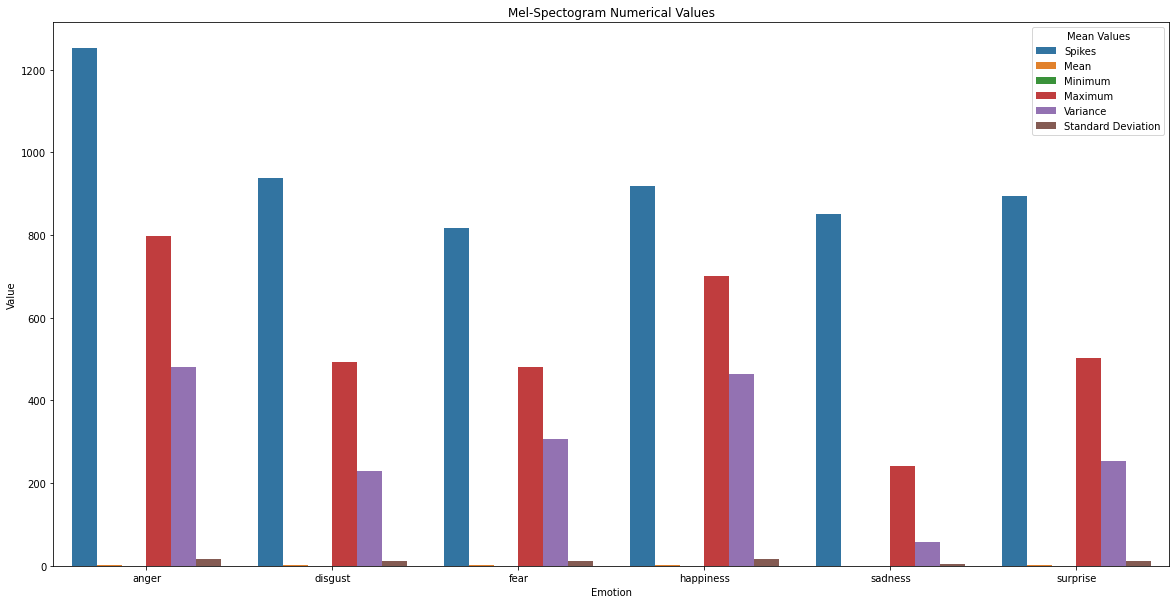

In [8]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spikes"]*6+["Mean"]*6+["Minimum"]*6+["Maximum"]*6+["Variance"]*6+["Standard Deviation"]*6,
        list(emotion_df['spikes_mel_spect'].values)+list(emotion_df['mean_mel_spect'].values)+\
        list(emotion_df['min_mel_spect'].values)+list(emotion_df['max_mel_spect'].values)+\
        list(emotion_df['var_mel_spect'].values)+list(emotion_df['std_mel_spect'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 10))
plt.title("Mel-Spectogram Numerical Values")
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of Spectral Values

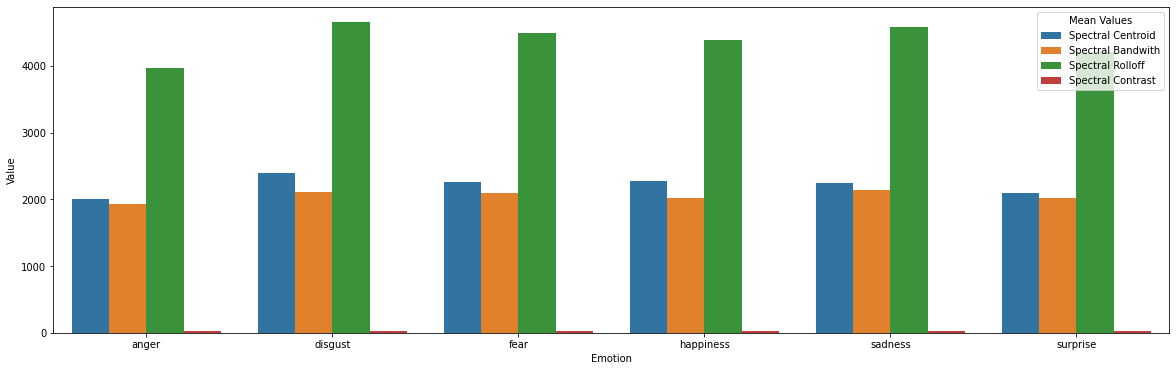

In [9]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spectral Centroid"]*6+["Spectral Bandwith"]*6+
            ["Spectral Rolloff"]*6+["Spectral Contrast"]*6,
        list(emotion_df['mean_spec_cent'].values)+list(emotion_df['mean_spec_bw'].values)+\
            list(emotion_df['mean_spec_rolloff'].values)+list(emotion_df['mean_spec_cont'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of other Features

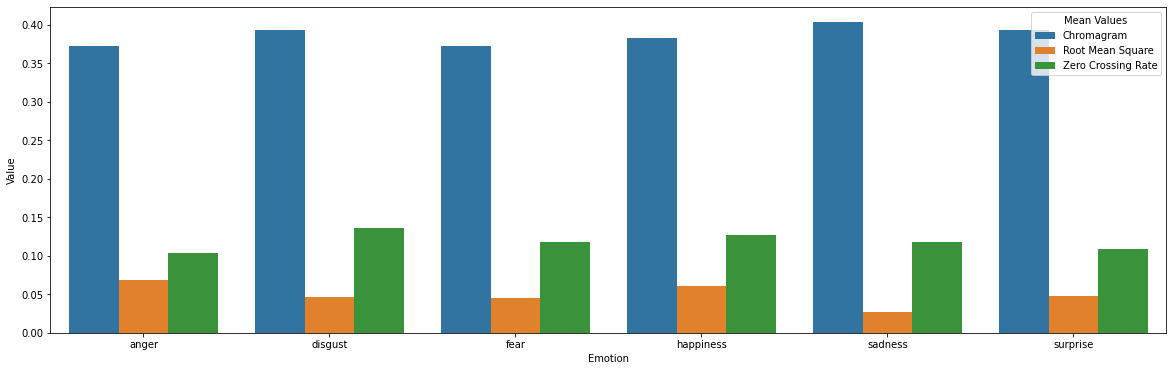

In [10]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['mean_chroma_stft'].values)+list(emotion_df['mean_rms'].values)+list(emotion_df['mean_zcr'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of MFCC Values

# Single Feature Analysis

In [11]:
def analyse_feature(df, feature):
    fig = plt.figure(figsize=(20, 11))
    fig.suptitle(feature, fontsize=18)

    grid = plt.GridSpec(3, 6, wspace=.6, hspace=.4)
    # y_ticks = np.arange(0.0, 1.1, 0.1)

    ax = plt.subplot(grid[0, :])
    ax.set_title("For All Subjects")
    sns.boxplot(x=df["Emotion"], y=df[feature], width=0.3, ax=ax)
    # ax.set_yticks(y_ticks)

    for i in range(1,6):
        if i < 3:
            r, c_s, c_f = 1, (i-1)*3, (i-1)*3+3
        else:
            r, c_s, c_f = 2, (i-3)*2, (i-3)*2+2

        ax = plt.subplot(grid[r, c_s:c_f])
        ax.set_title(f"For Subject {i}")
        subj_data = df.loc[df.index == i]
        sns.boxplot(x=subj_data["Emotion"], y=subj_data[feature], width=0.3, ax=ax);
        # ax.set_yticks(y_ticks)

    plt.show()

## Zero Crossing Rate Analysis
## Unnormalized data
### Mean Metric

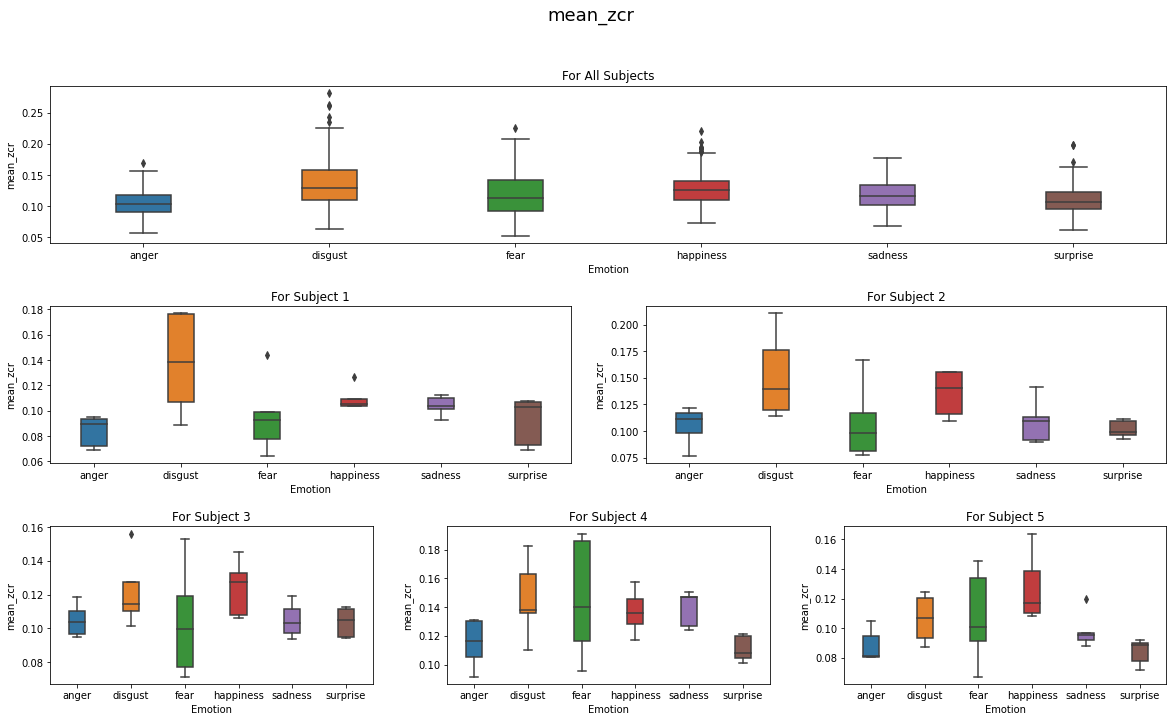

In [12]:
analyse_feature(df, "mean_zcr")

### Variance Metric

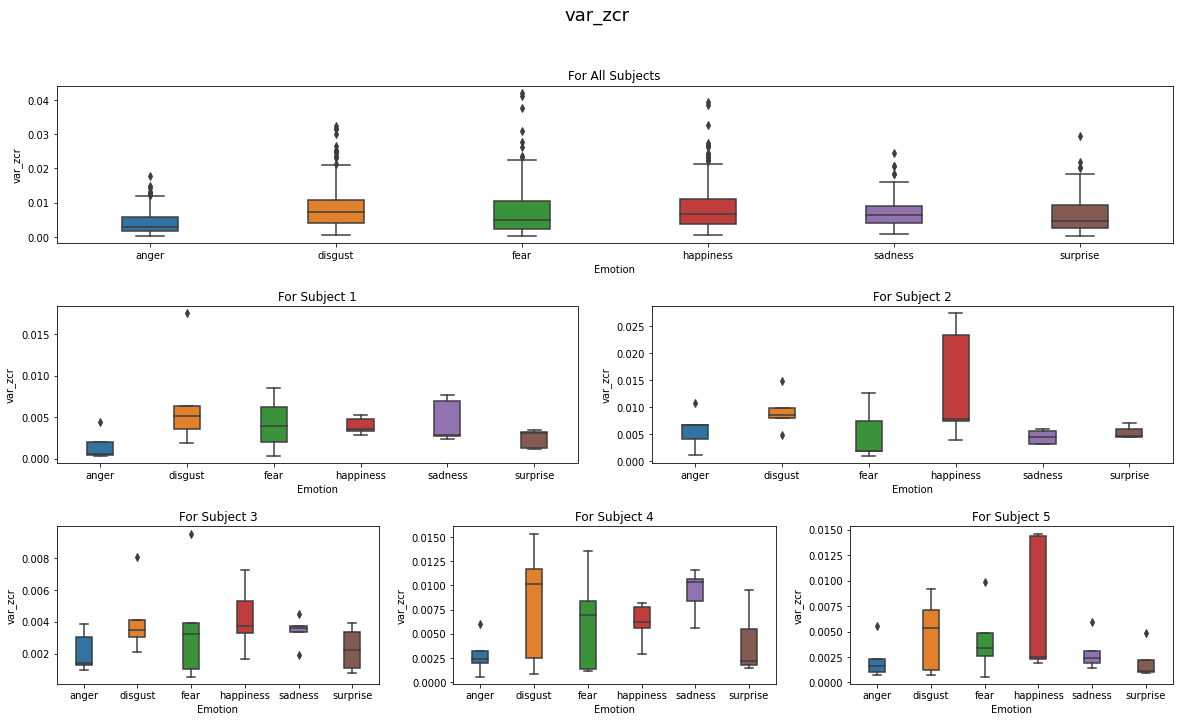

In [13]:
analyse_feature(df, "var_zcr")

### Standard Deviation Metric

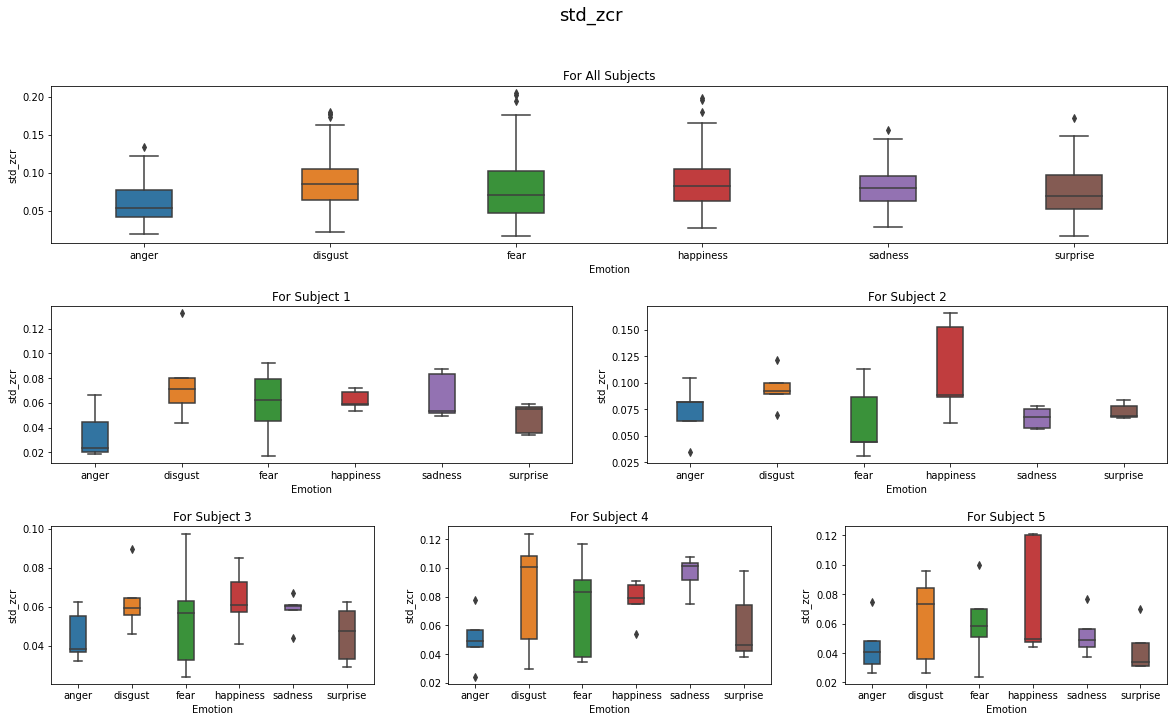

In [14]:
analyse_feature(df, "std_zcr")

### Number of Spikes Metric

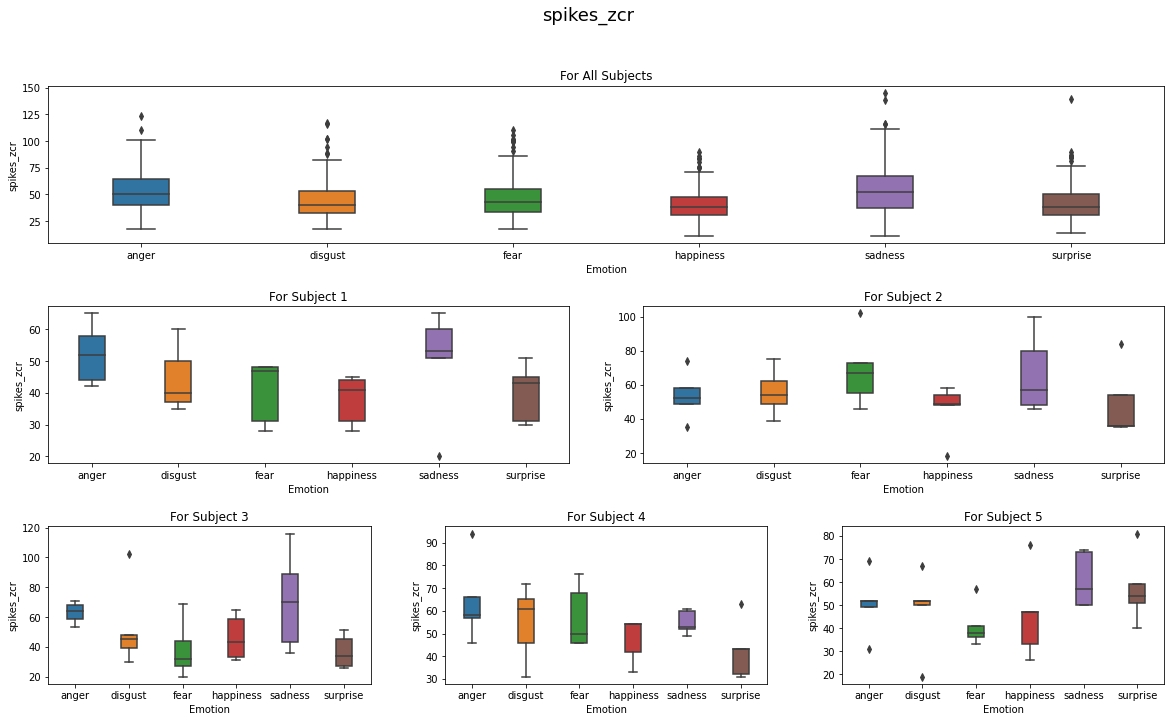

In [15]:
analyse_feature(df, "spikes_zcr")

### Sum Metric

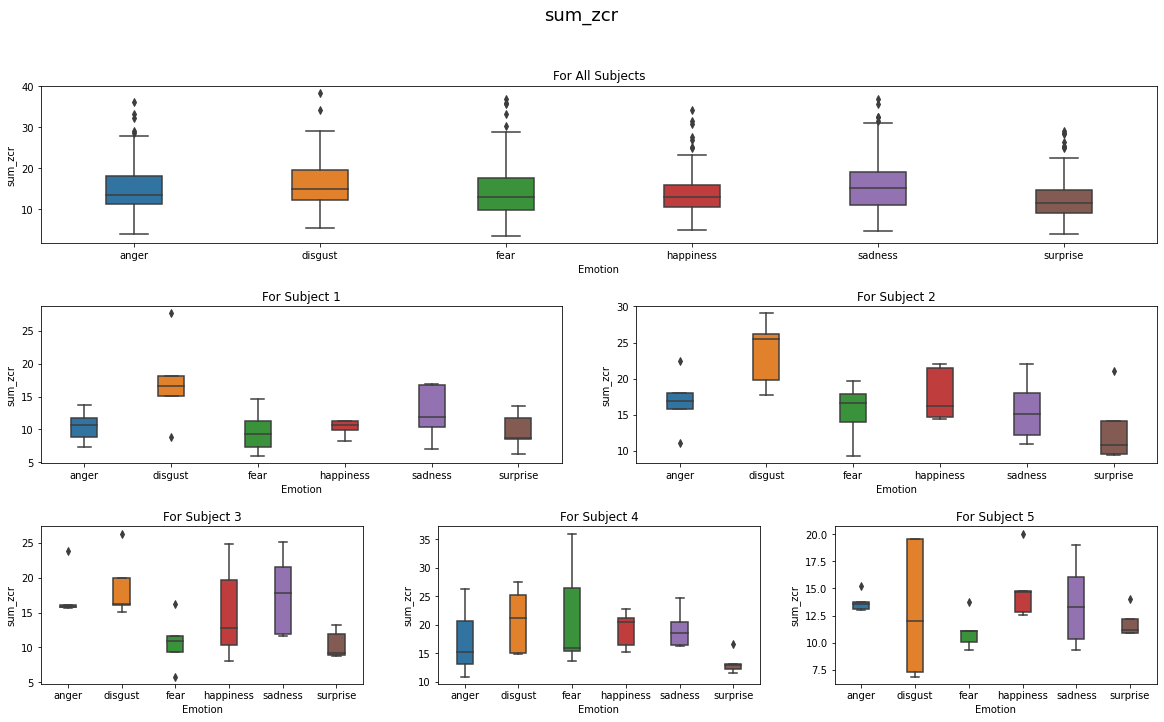

In [16]:
analyse_feature(df, "sum_zcr")

### Variation for different emotions

In [17]:
def step_plot(df, num_utterances, feature):
    emotions = ['anger', 'happiness', 'sadness', 'disgust', 'fear', 'surprise']
    
    fig = plt.figure(figsize=(15, 6))
    fig.suptitle(f"{feature} variation for different emotions", fontsize=16)
    plt.xlabel("Number of the speech utterance")
    plt.ylabel(feature)

    x = list(range(1, num_utterances+1, 1))
    for i, emotion in enumerate(emotions):
        plt.plot(x, df.loc[df['Emotion'] == emotion][feature][:num_utterances], 'o-', label=emotion)
    plt.legend()
    plt.show()

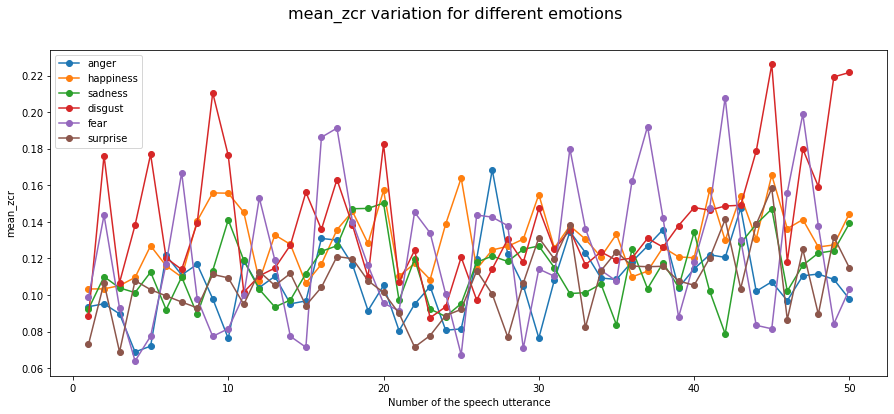

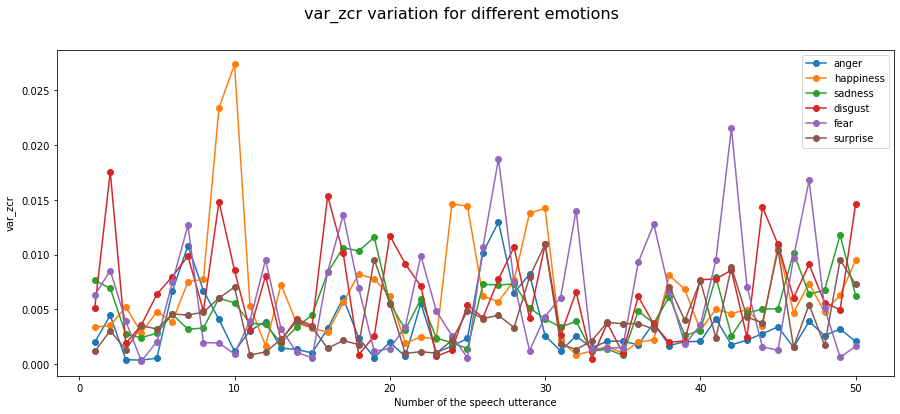

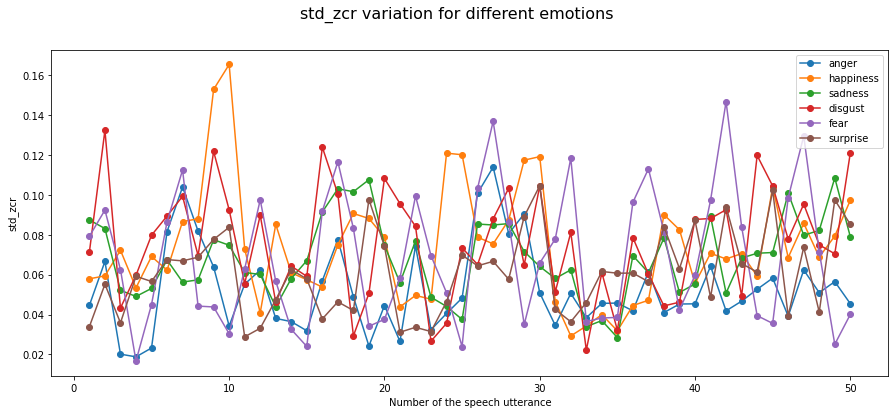

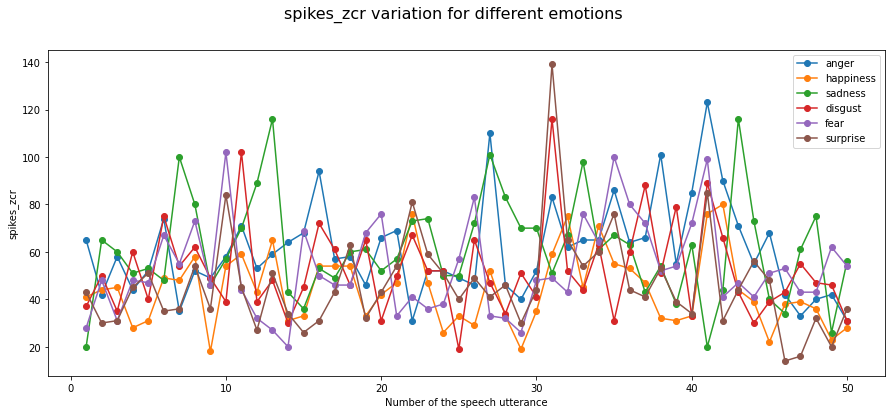

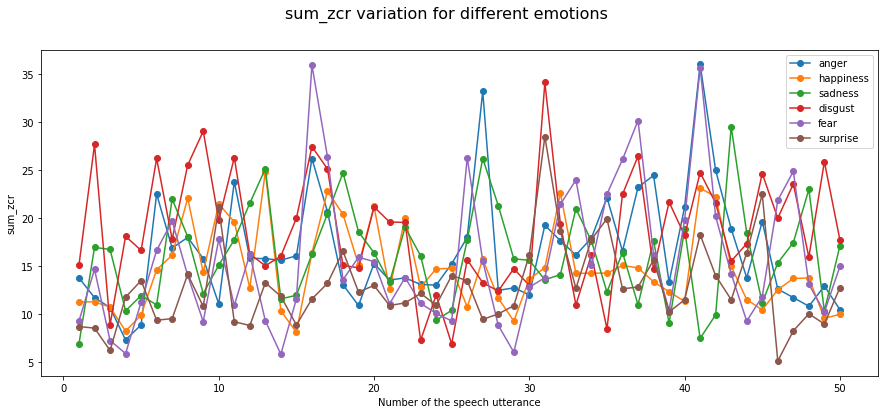

In [18]:
step_plot(df, 50, "mean_zcr")
step_plot(df, 50, "var_zcr")
step_plot(df, 50, "std_zcr")
step_plot(df, 50, "spikes_zcr")
step_plot(df, 50, "sum_zcr")

## All Features Box Plots

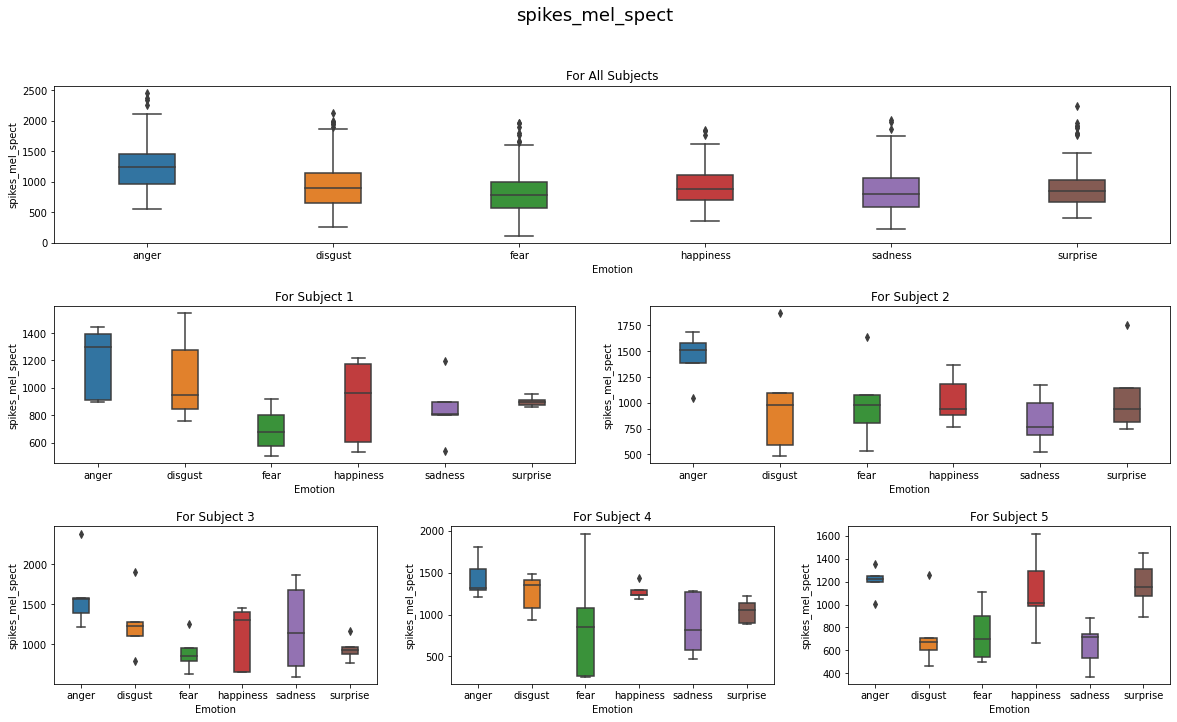

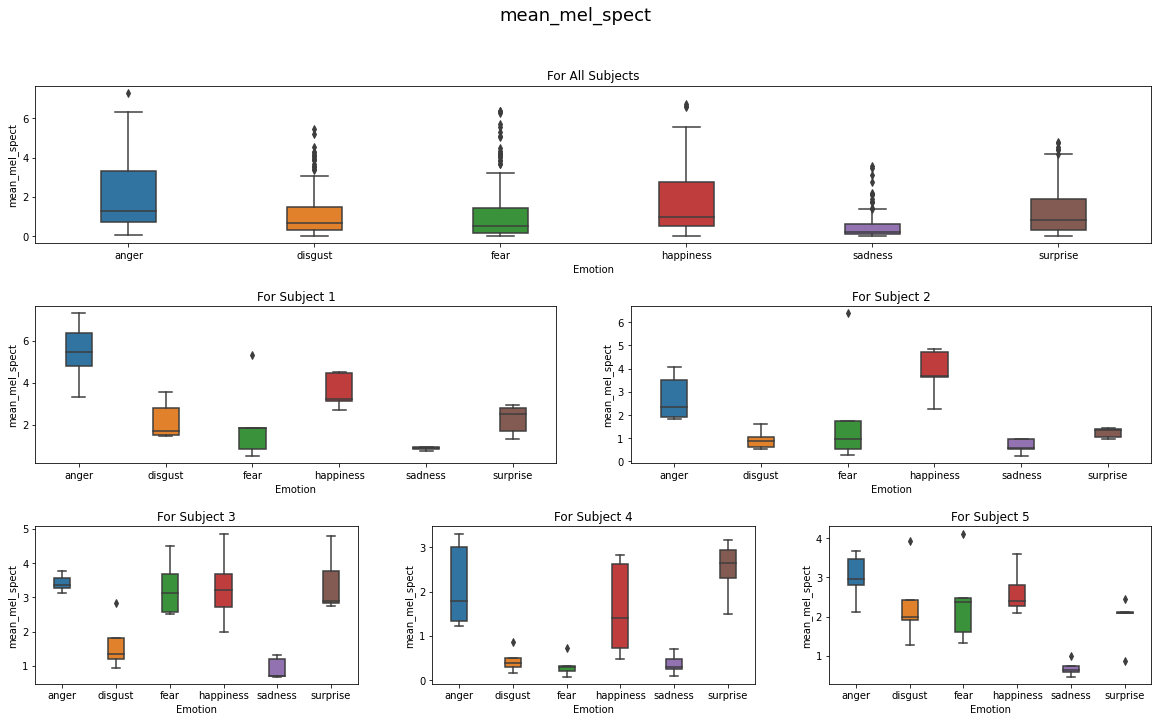

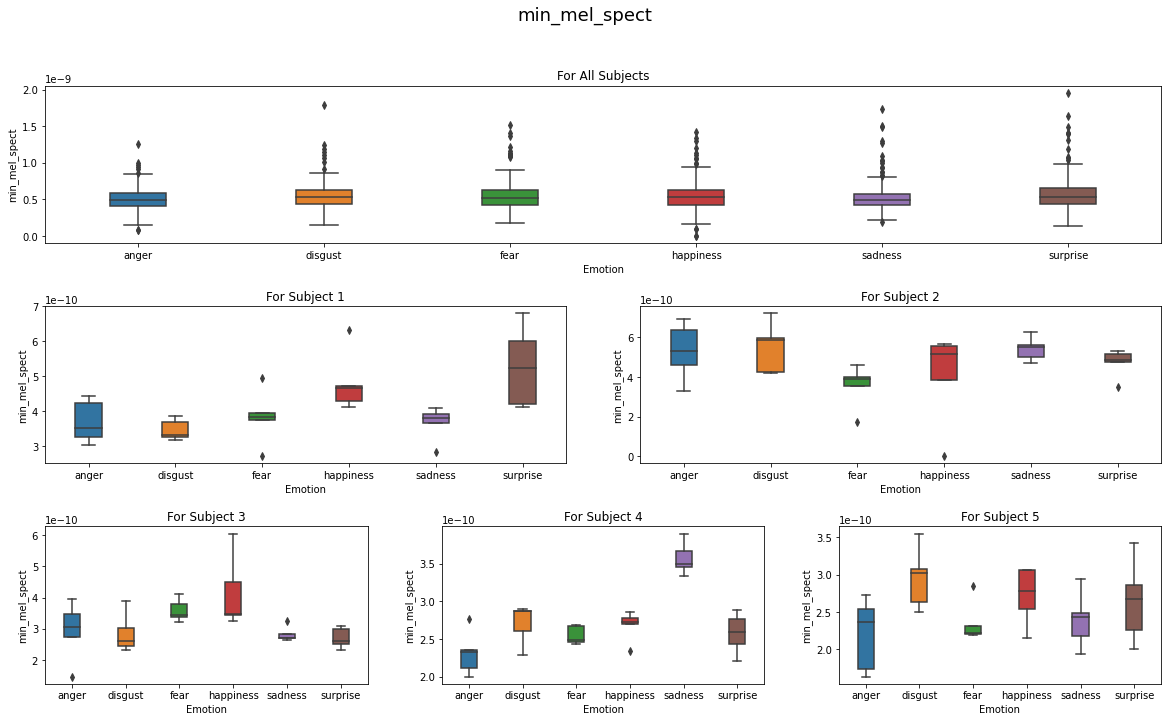

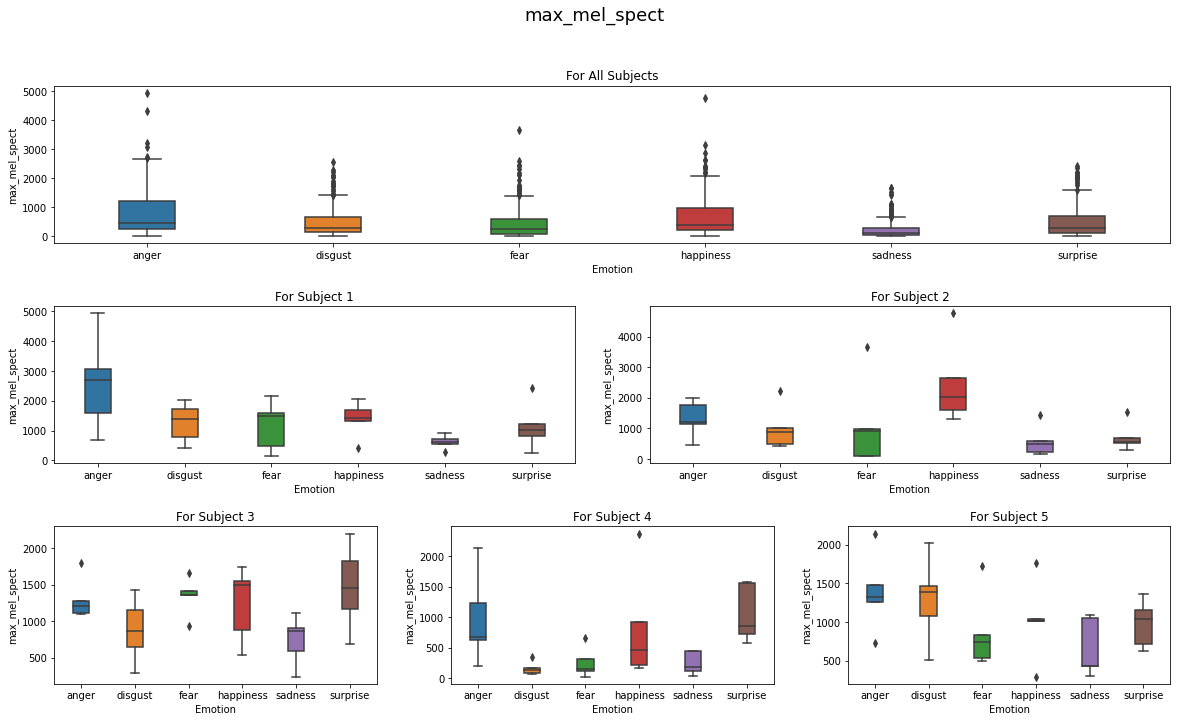

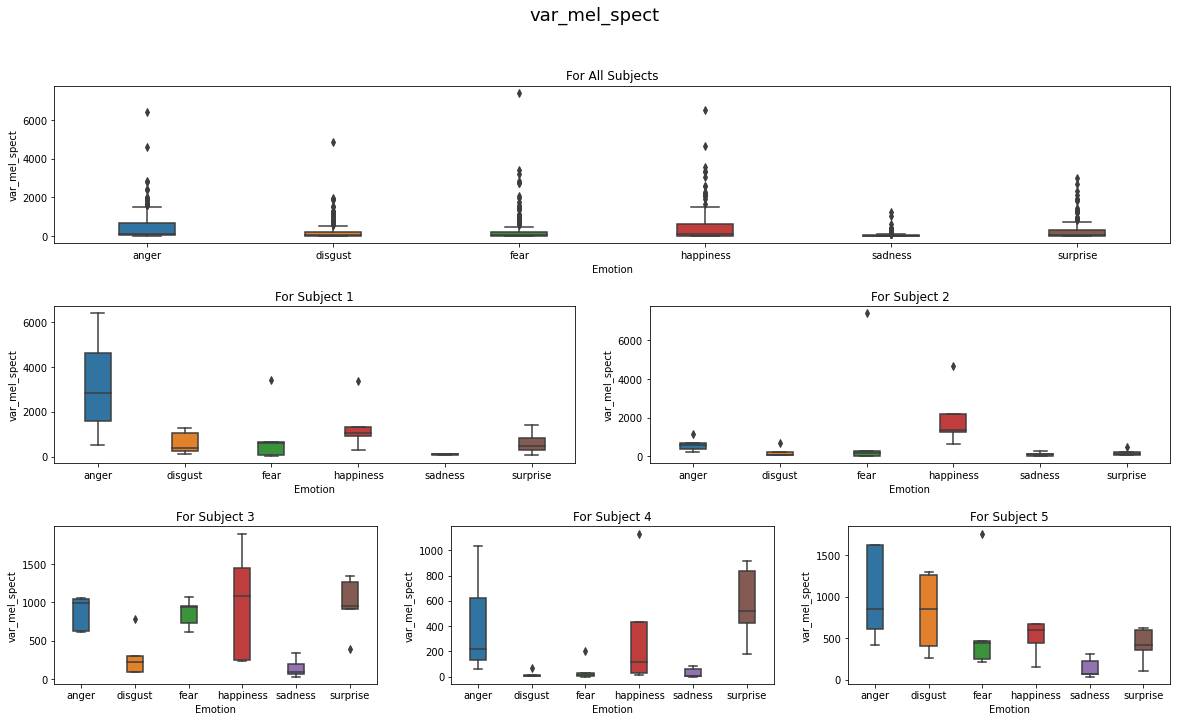

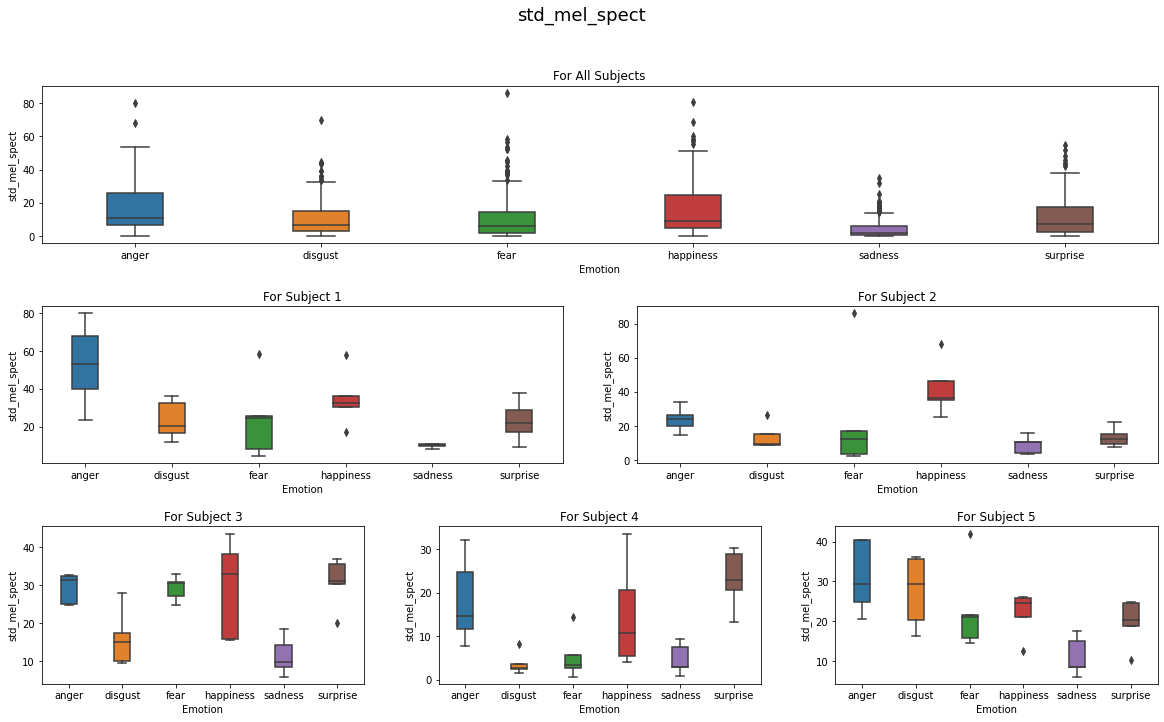

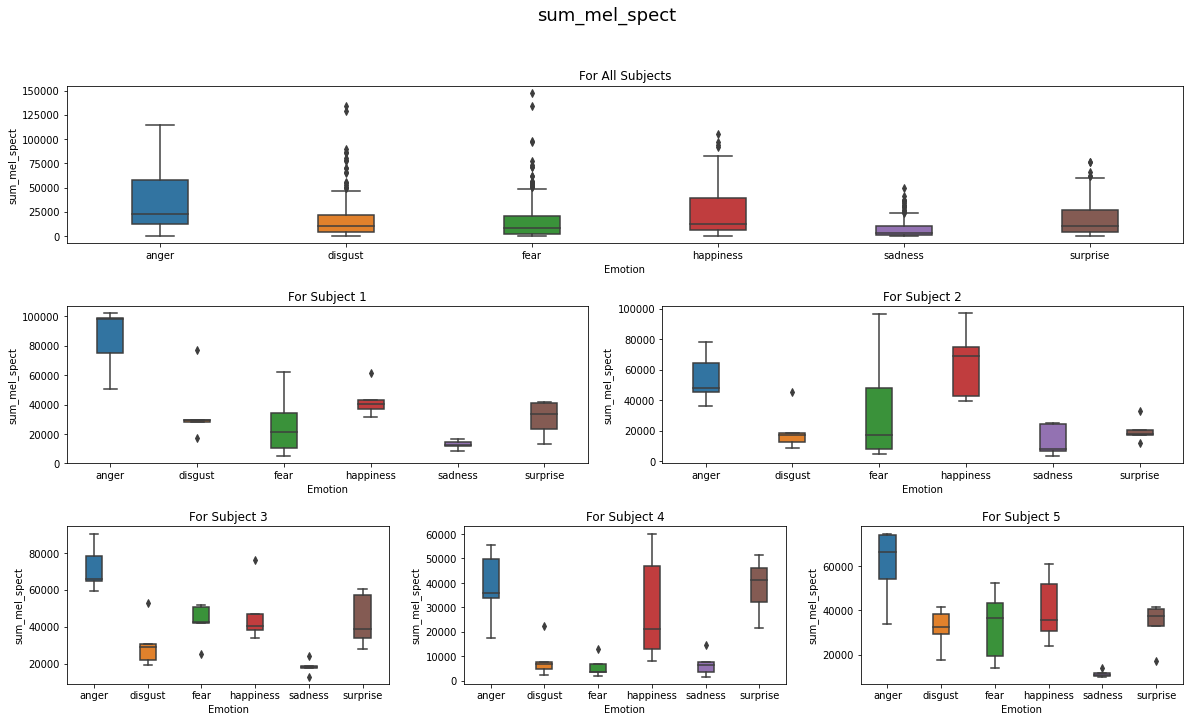

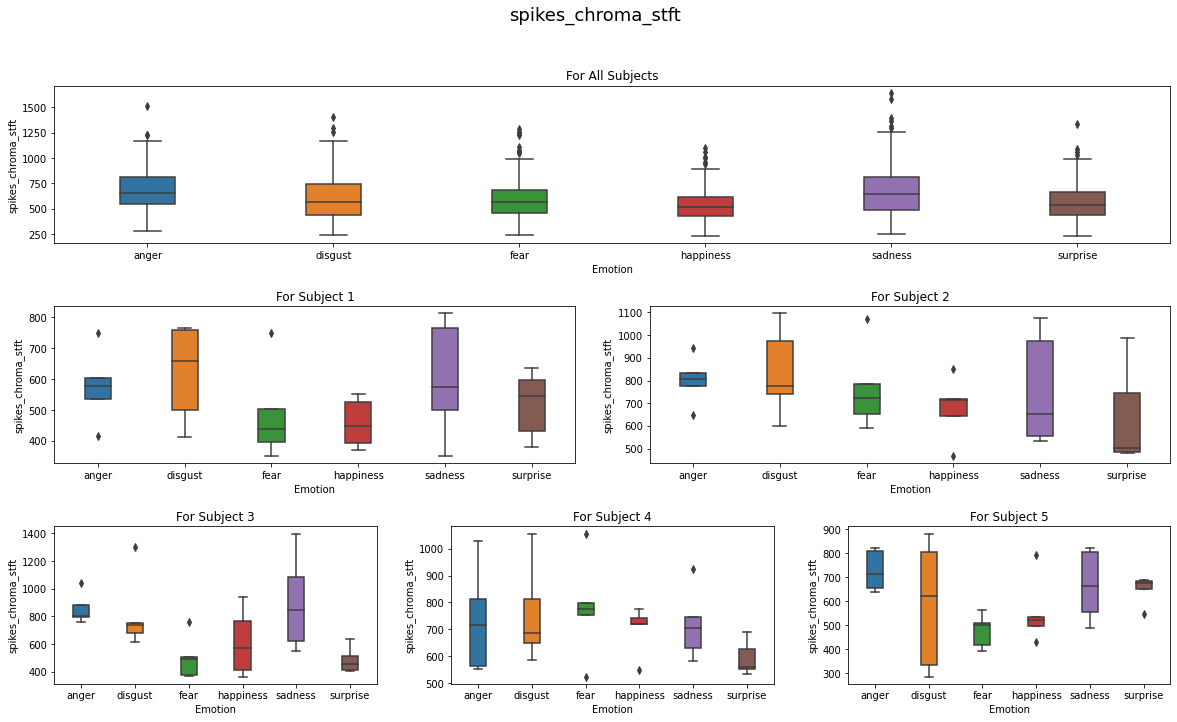

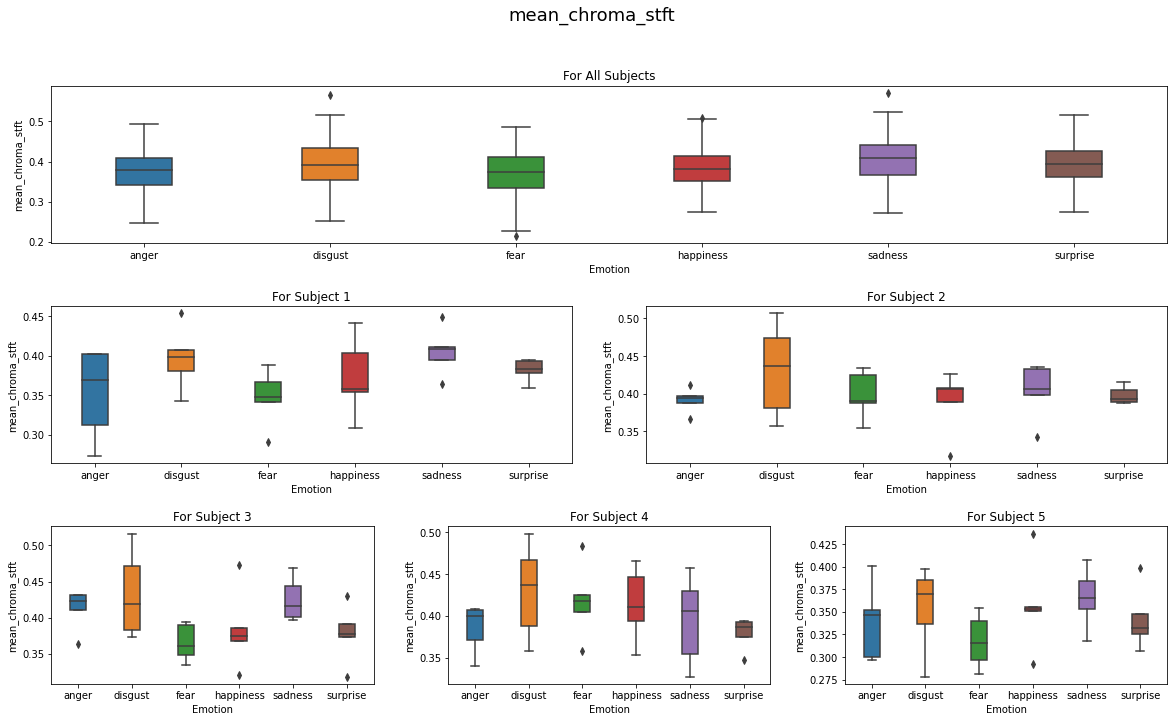

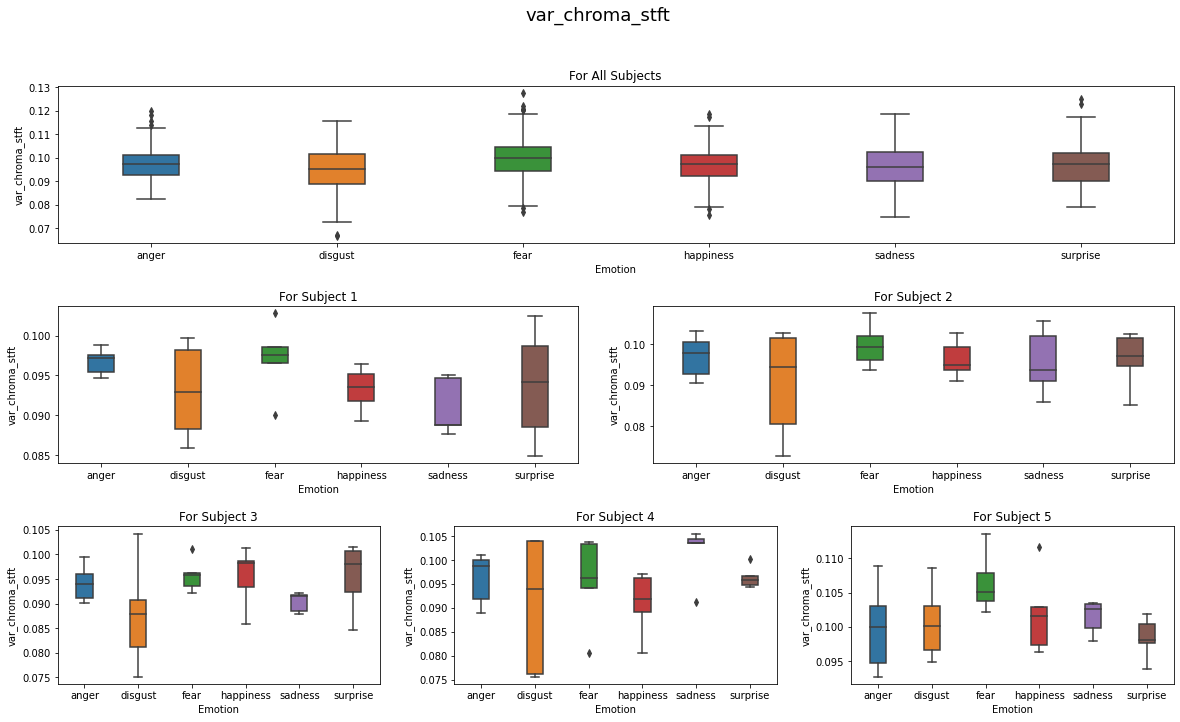

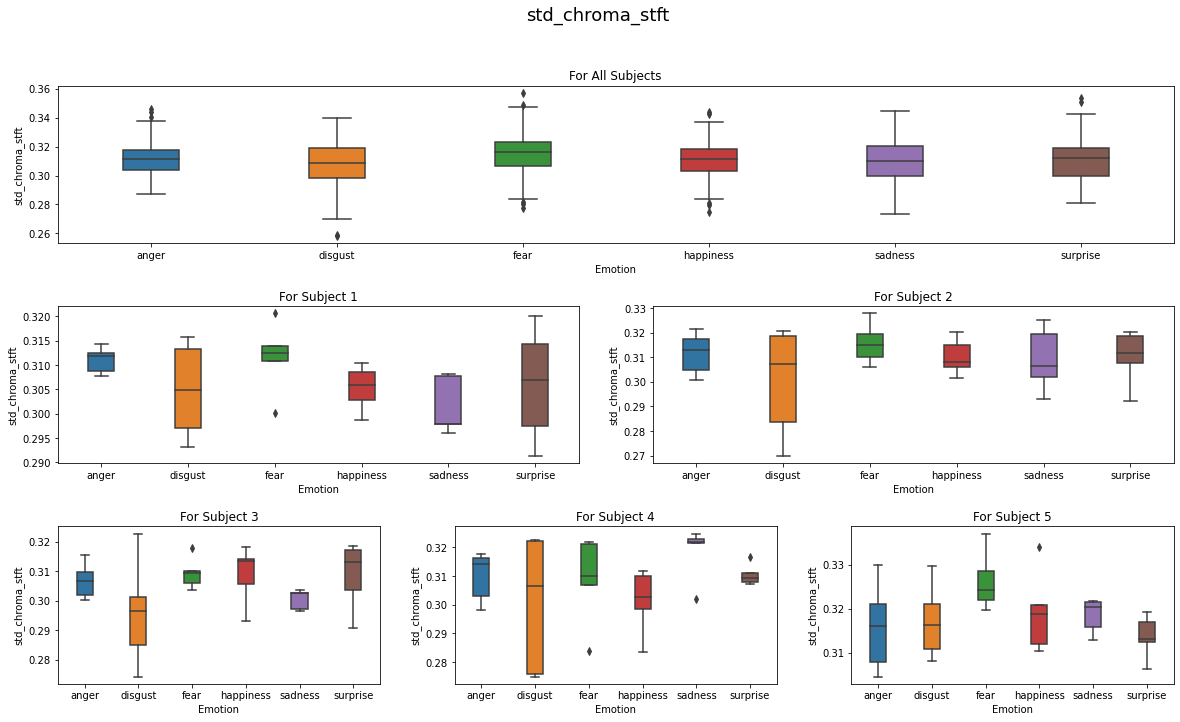

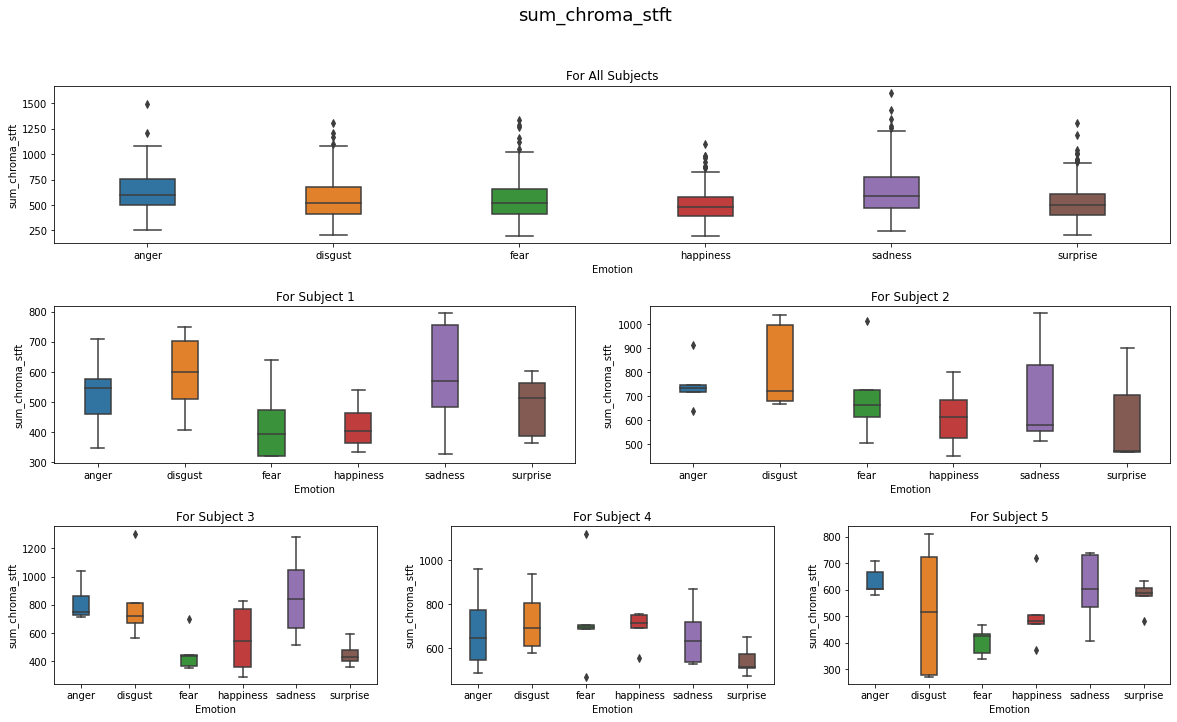

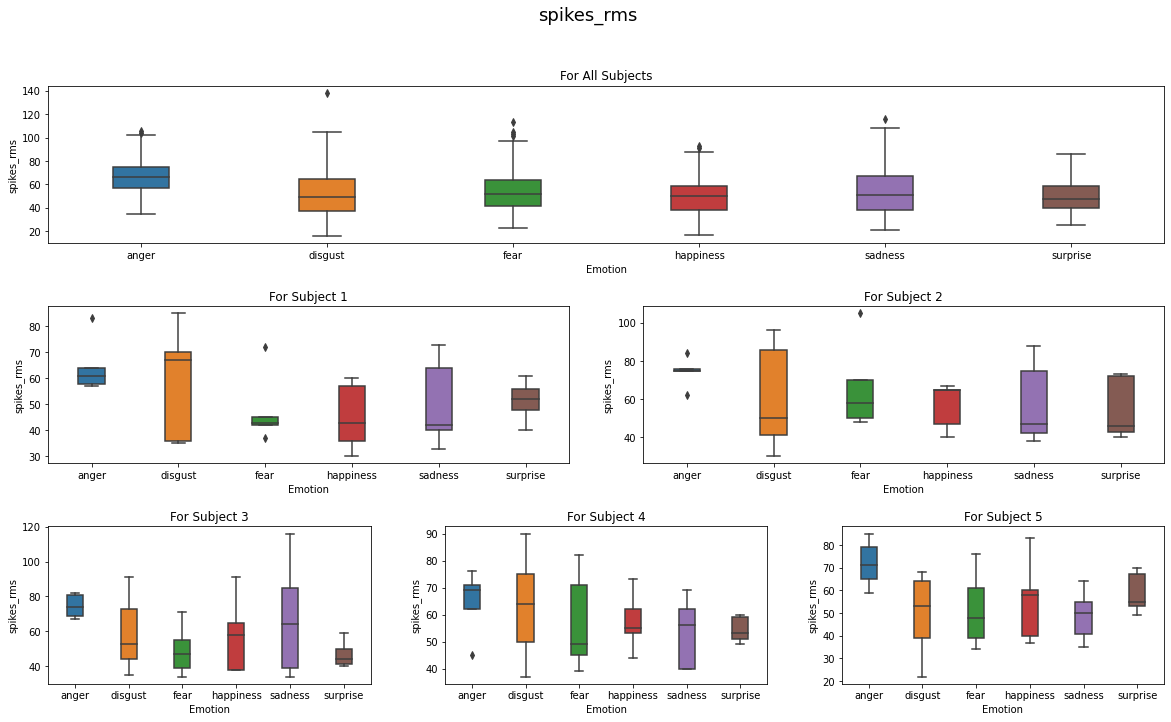

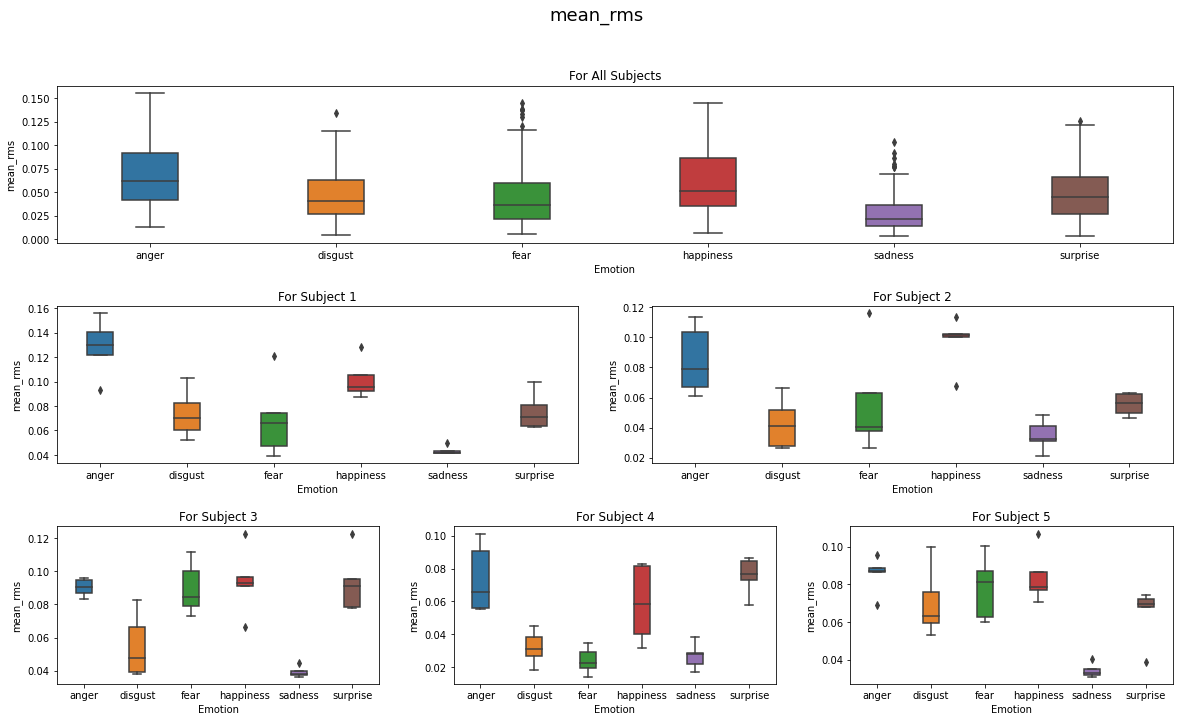

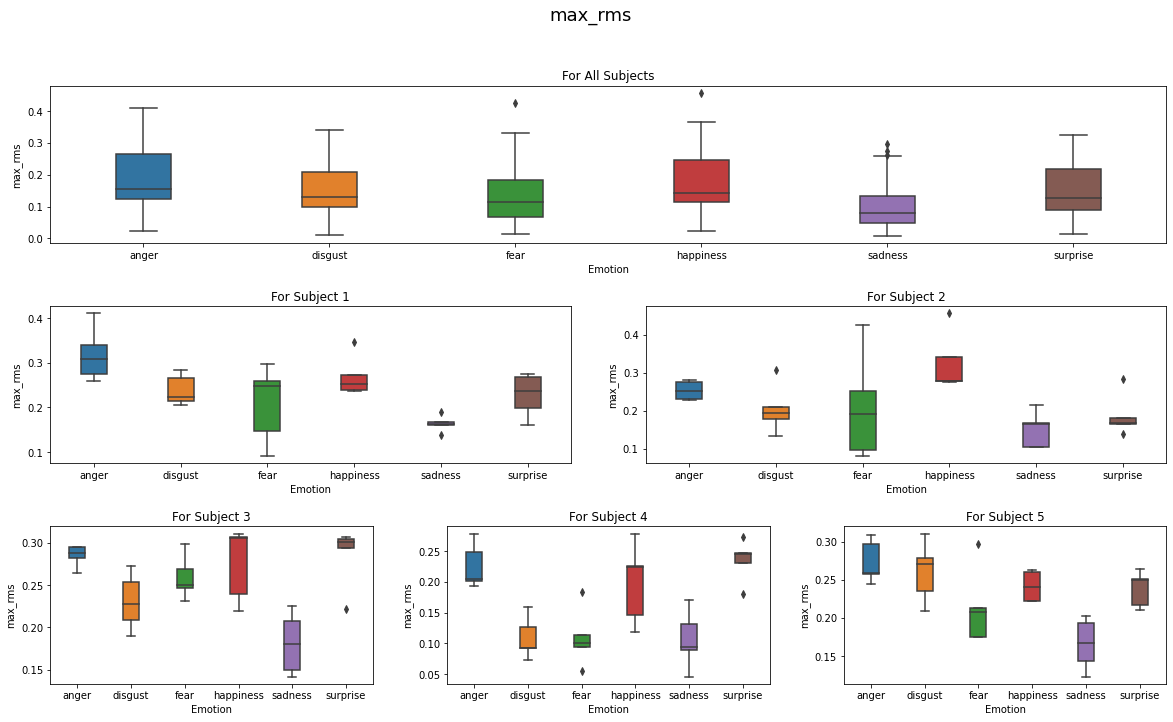

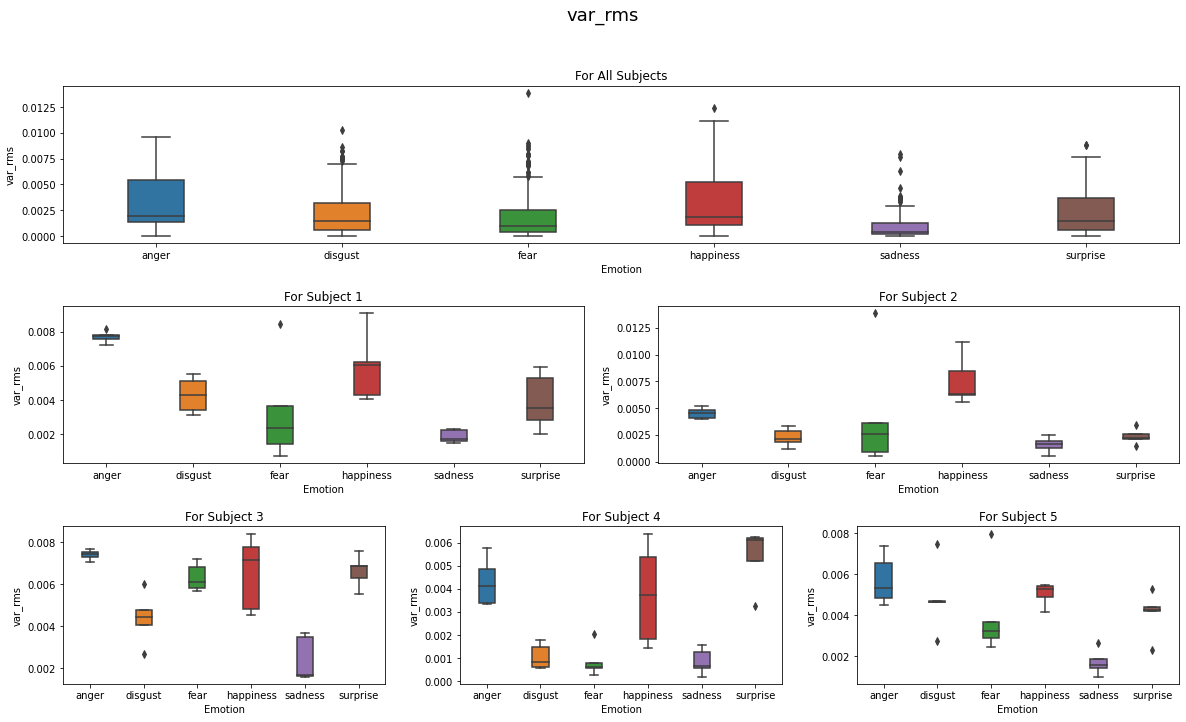

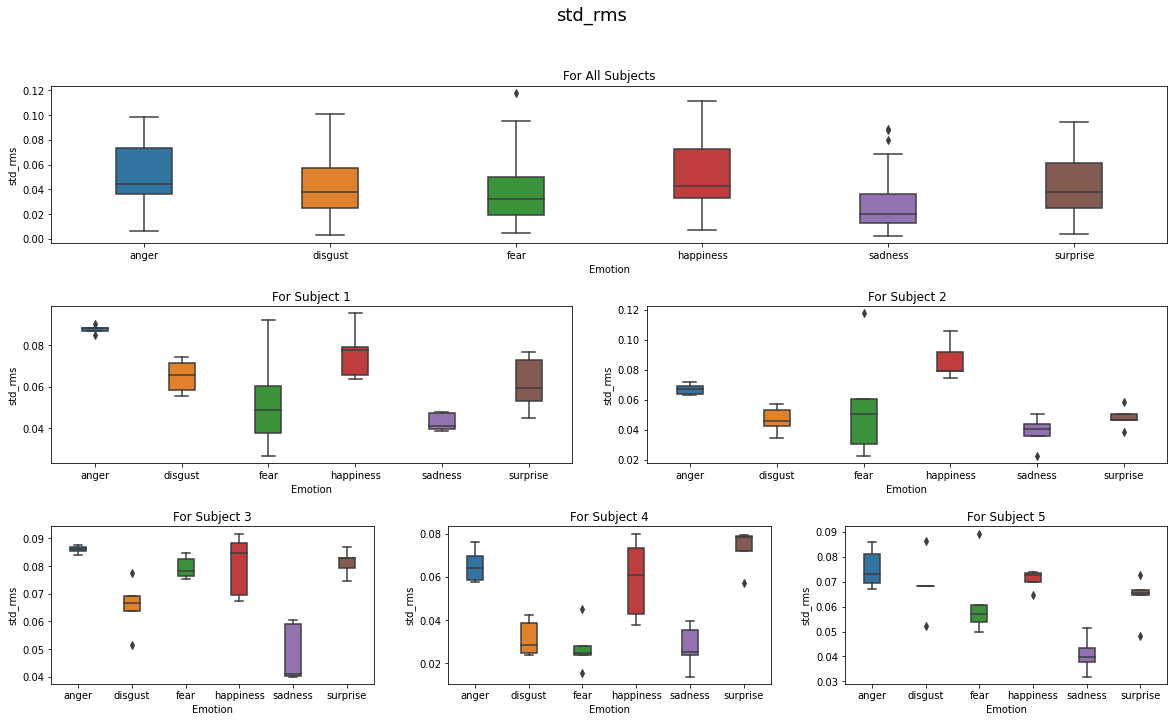

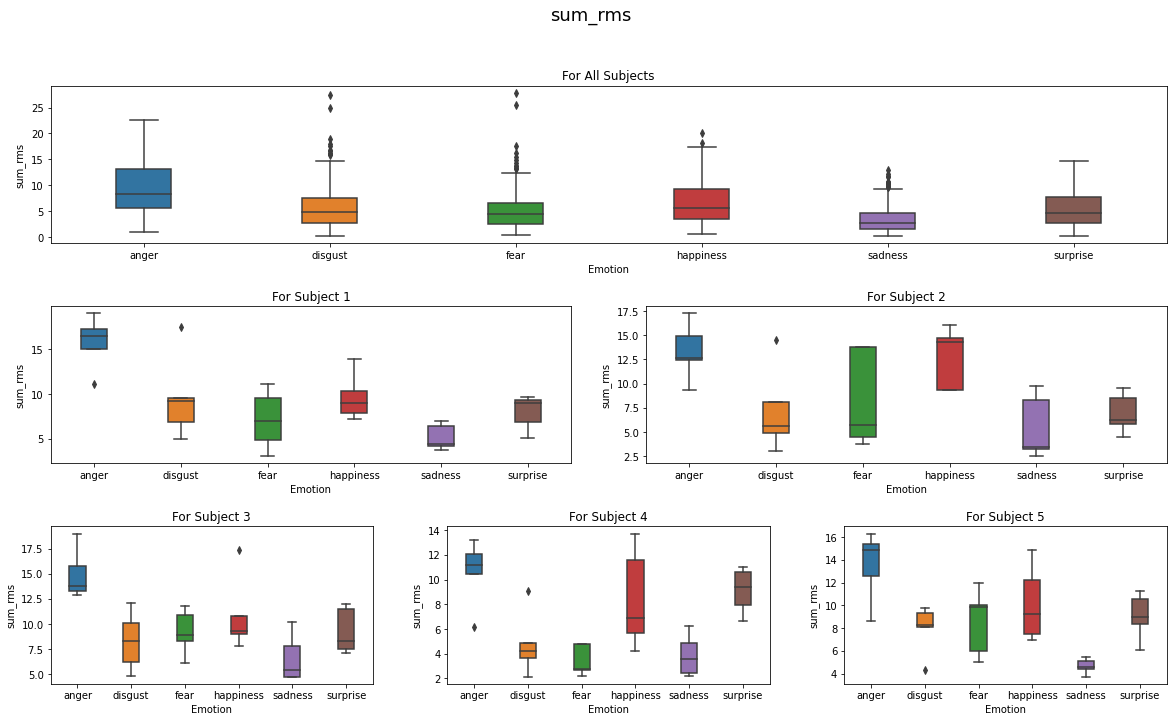

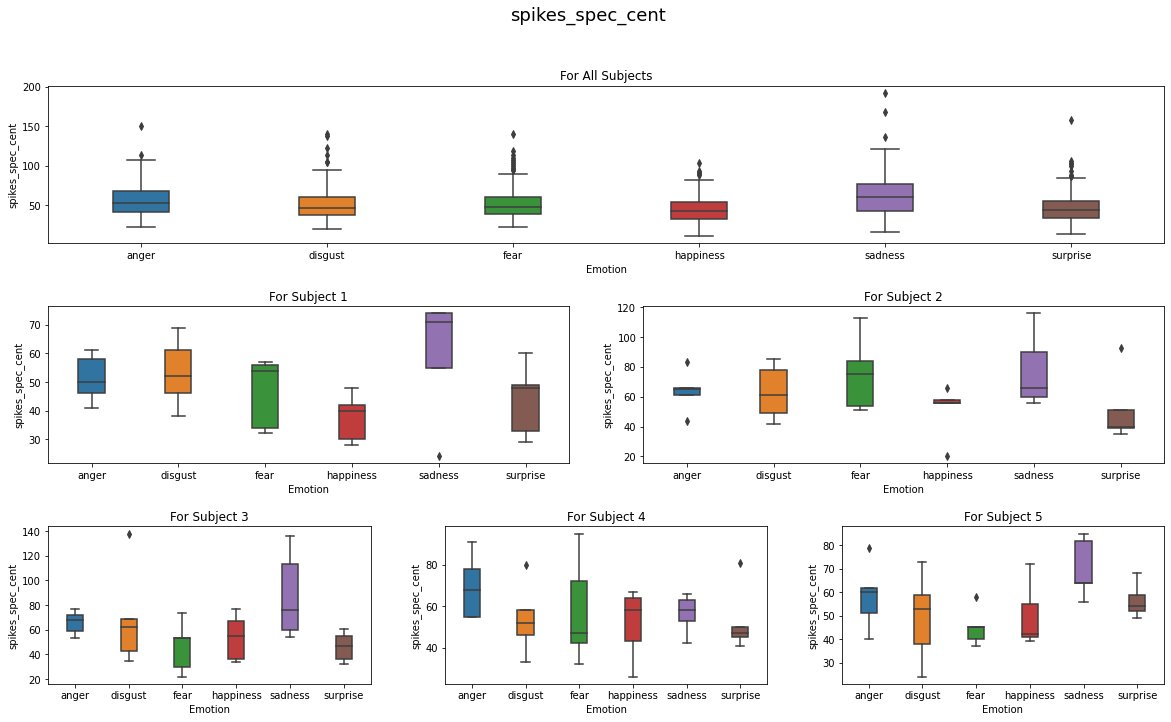

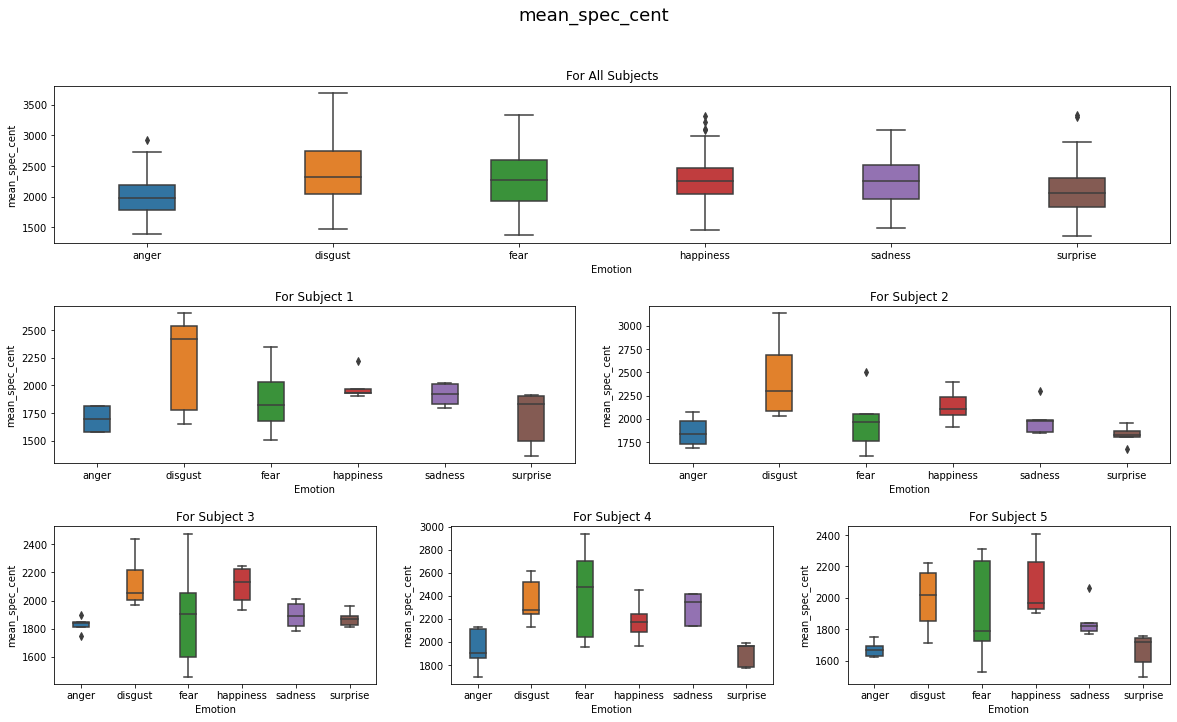

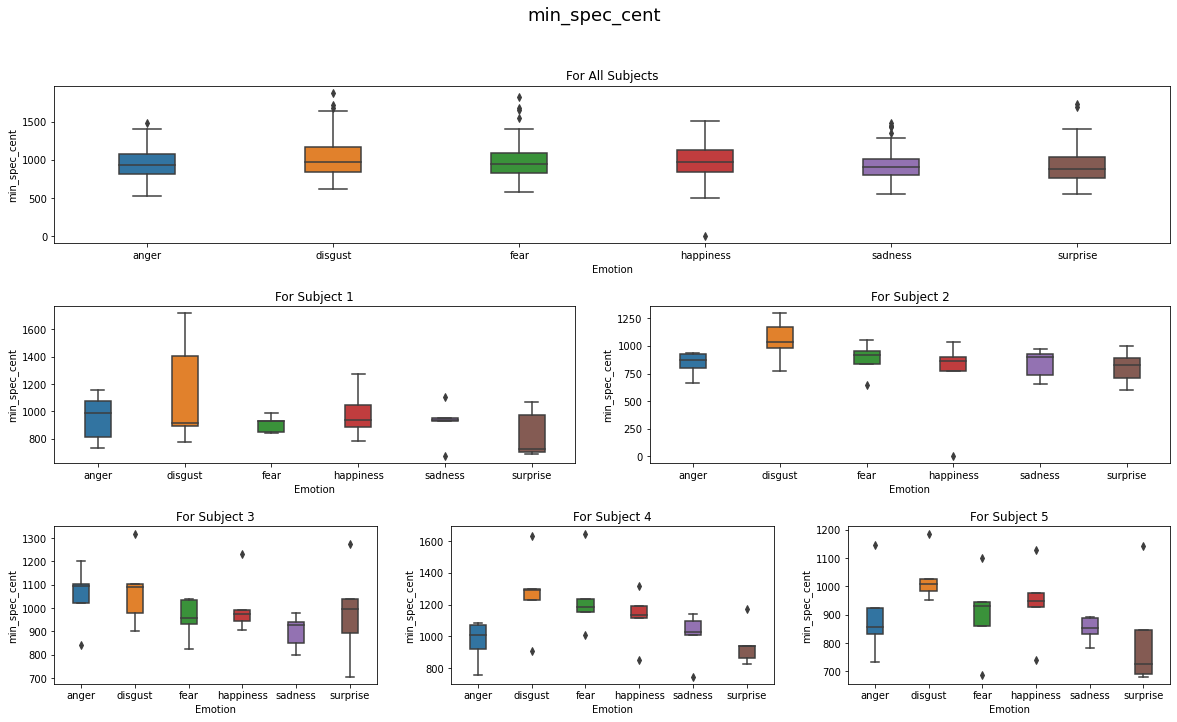

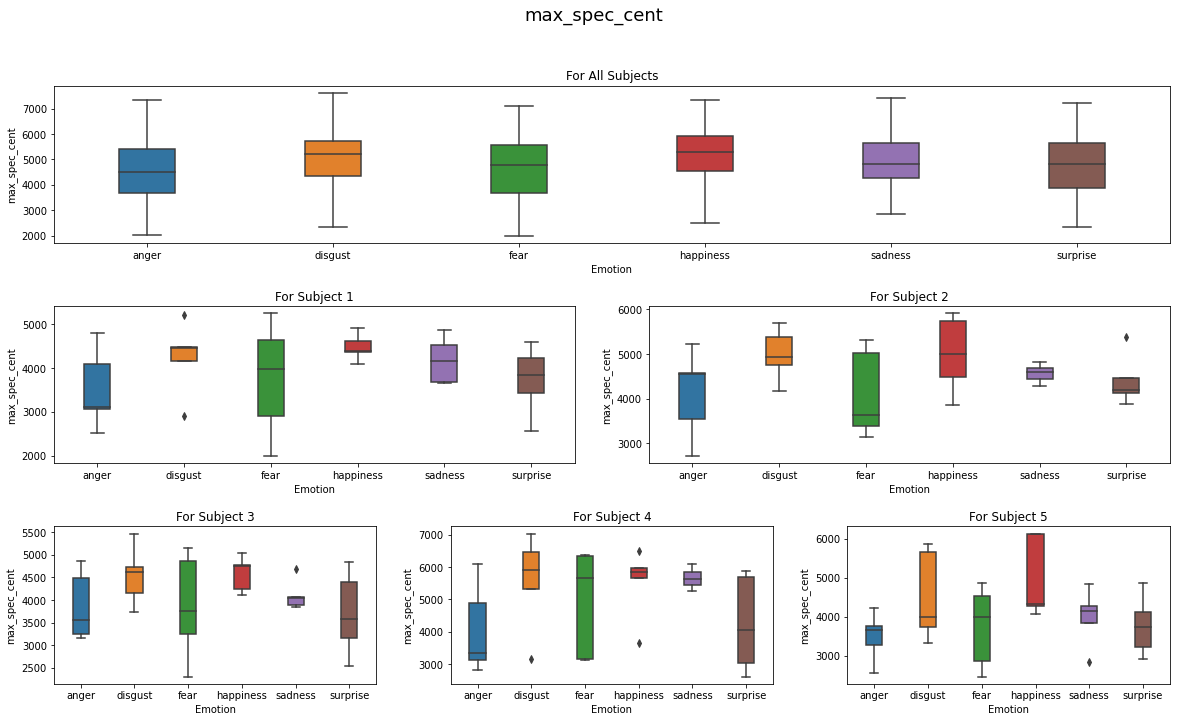

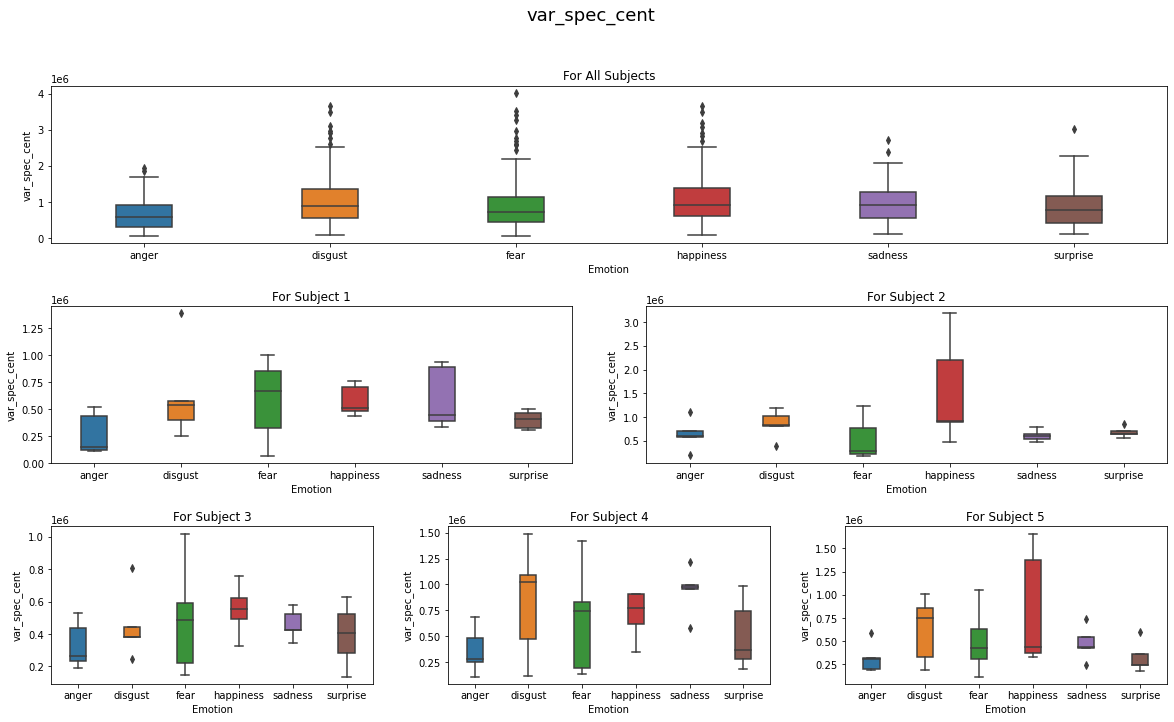

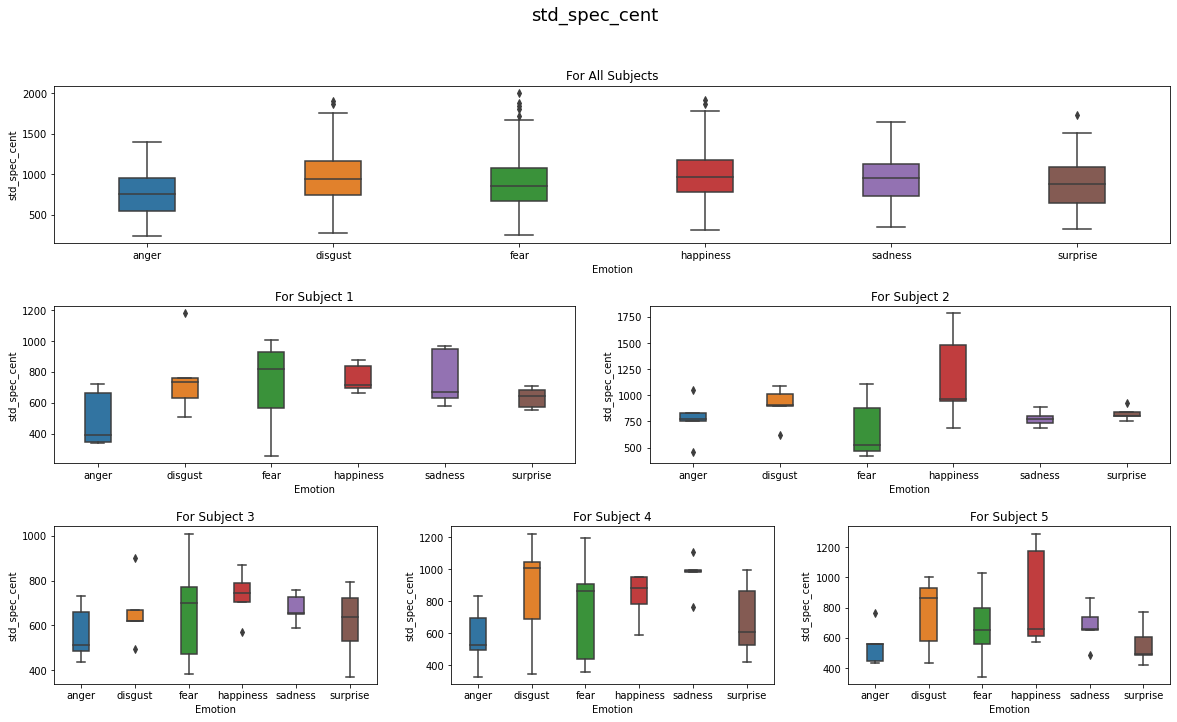

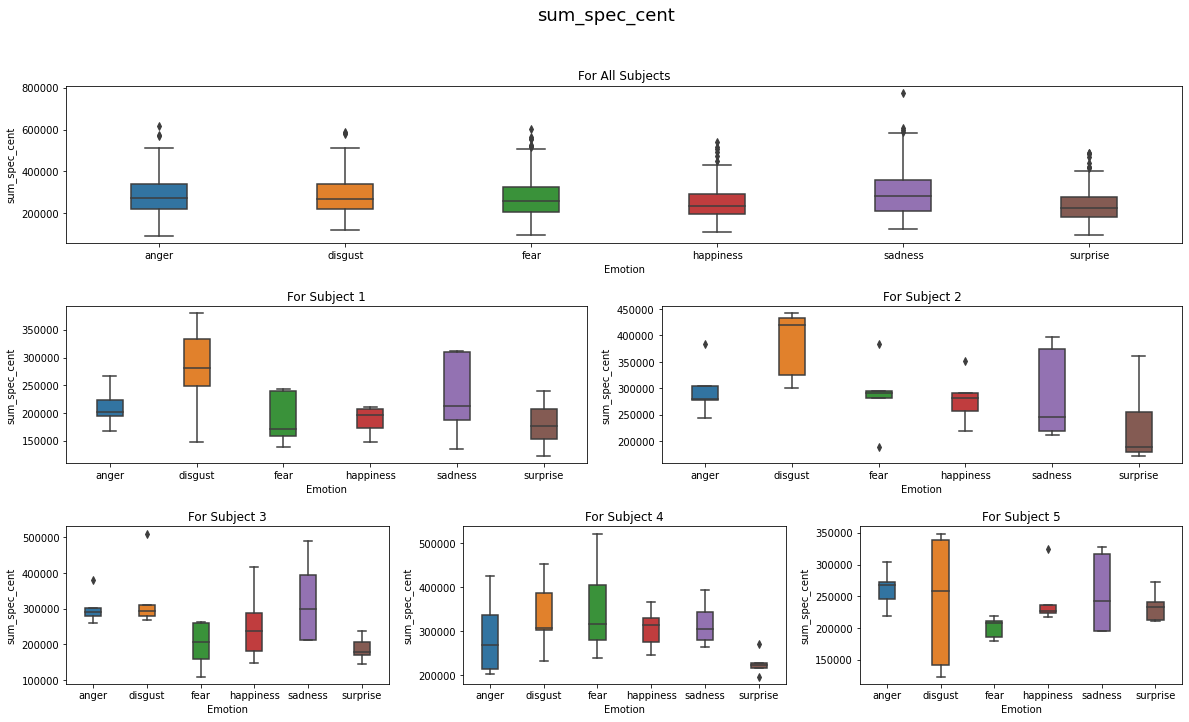

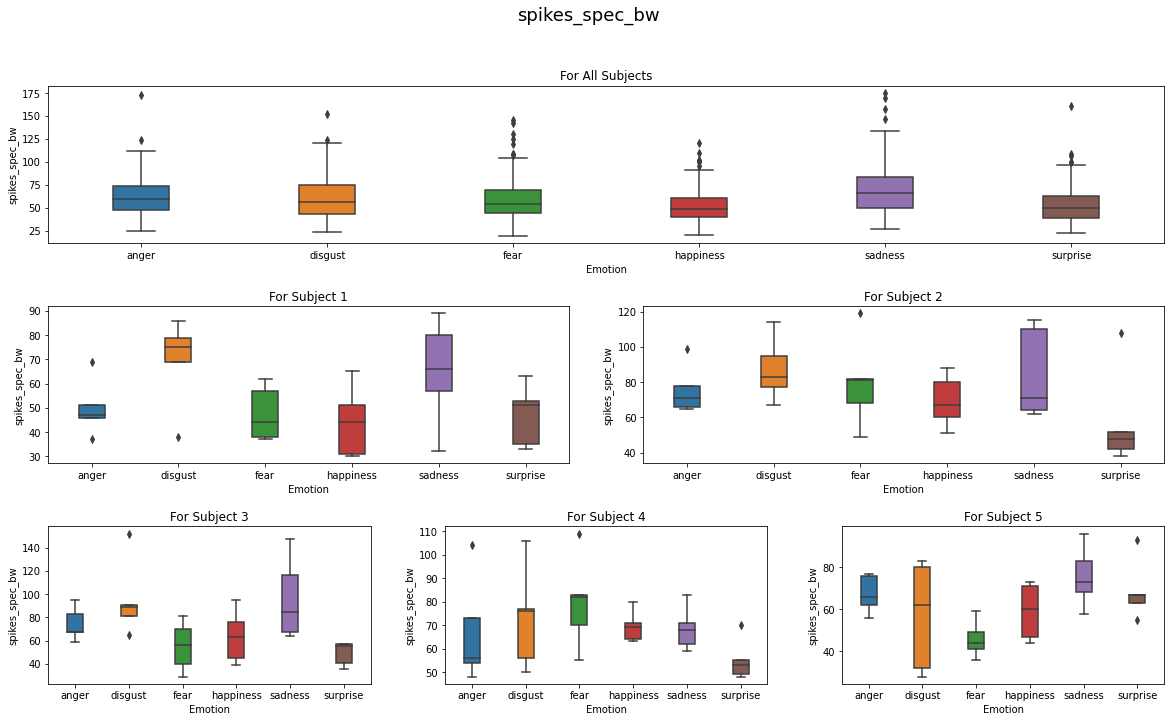

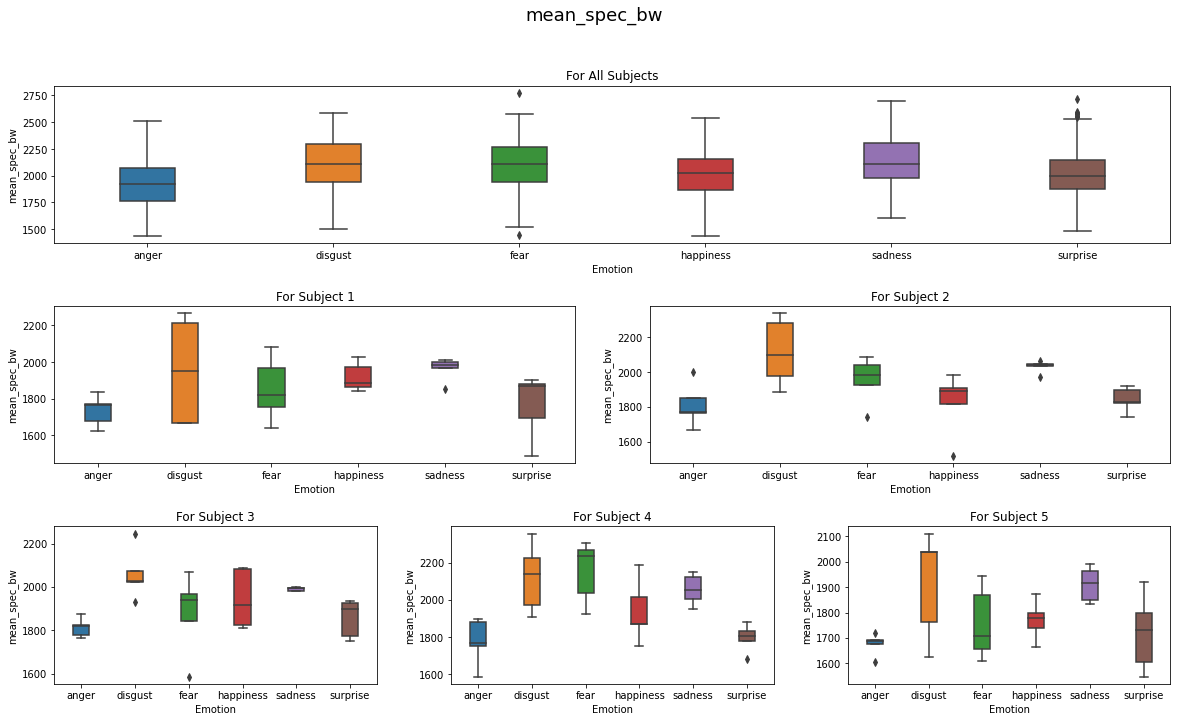

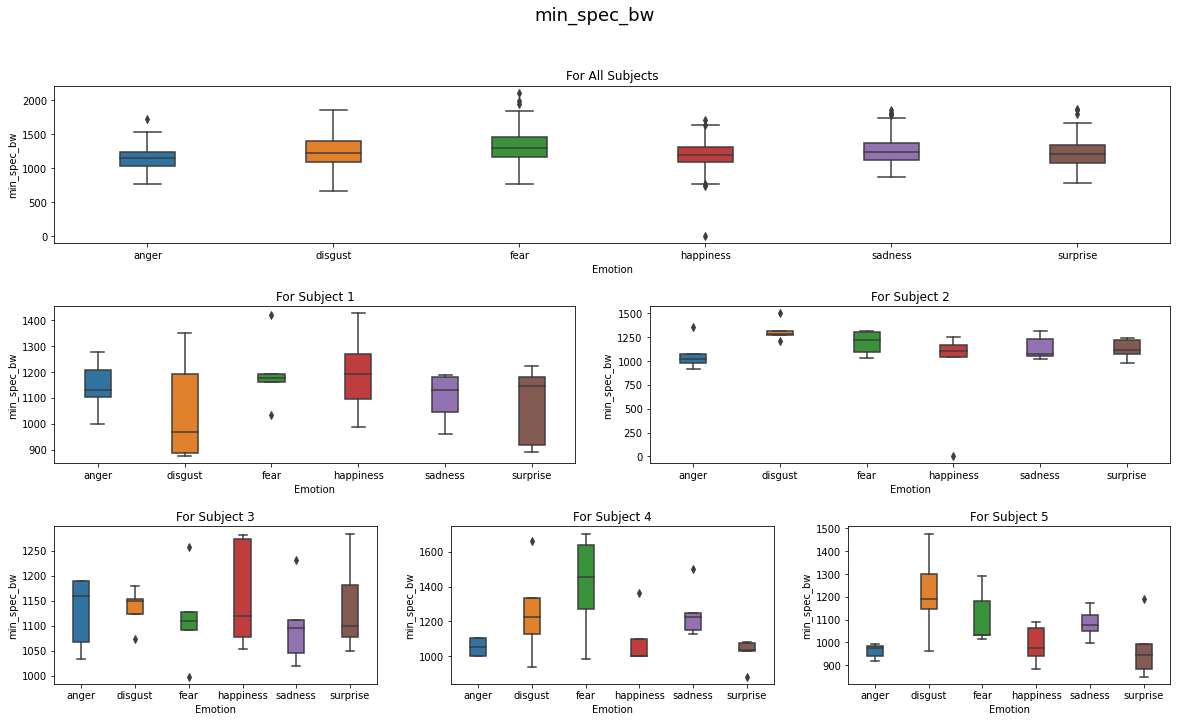

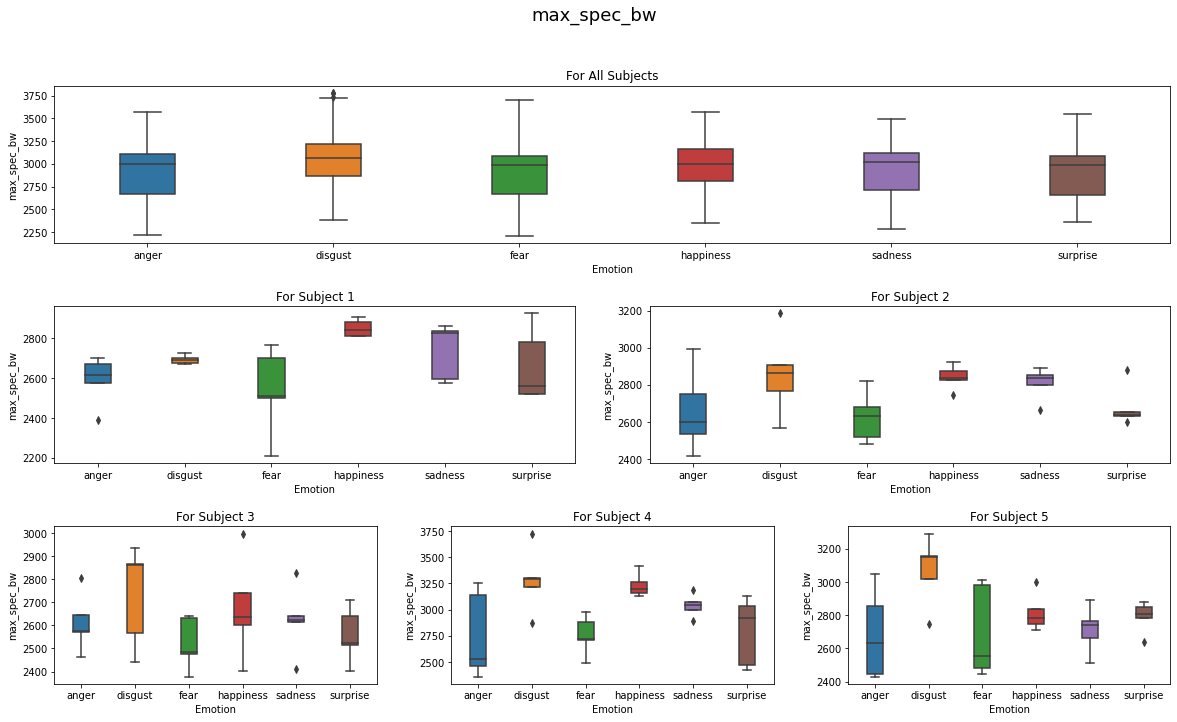

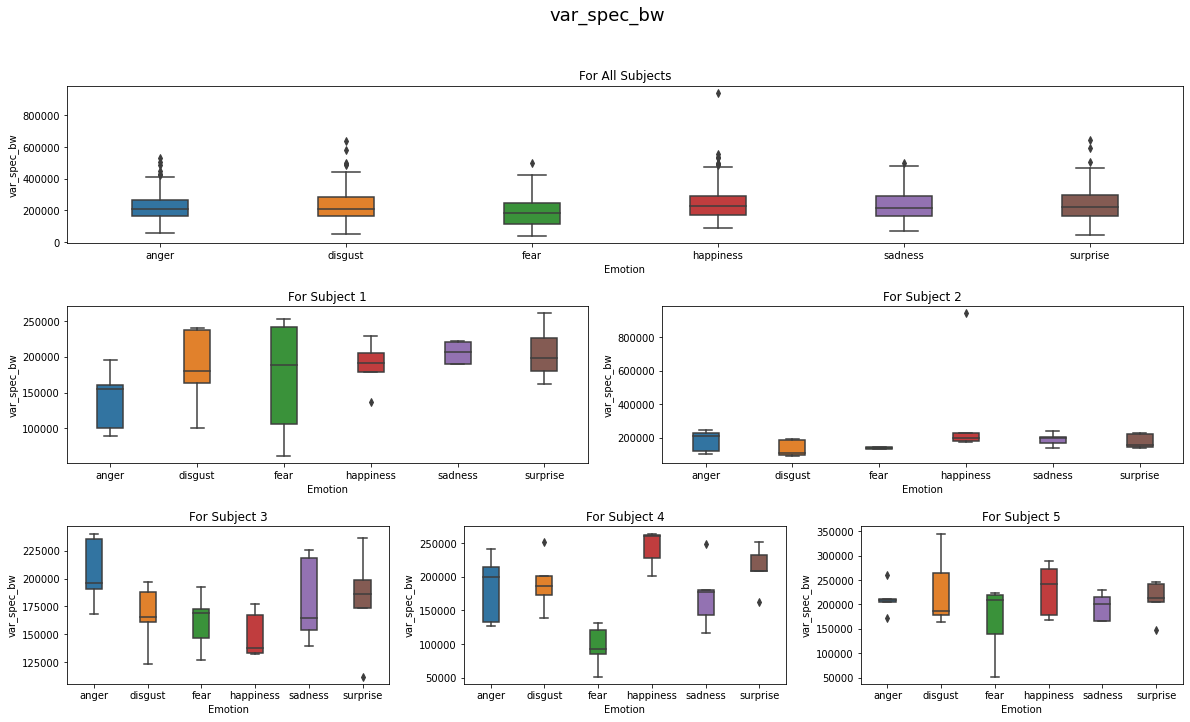

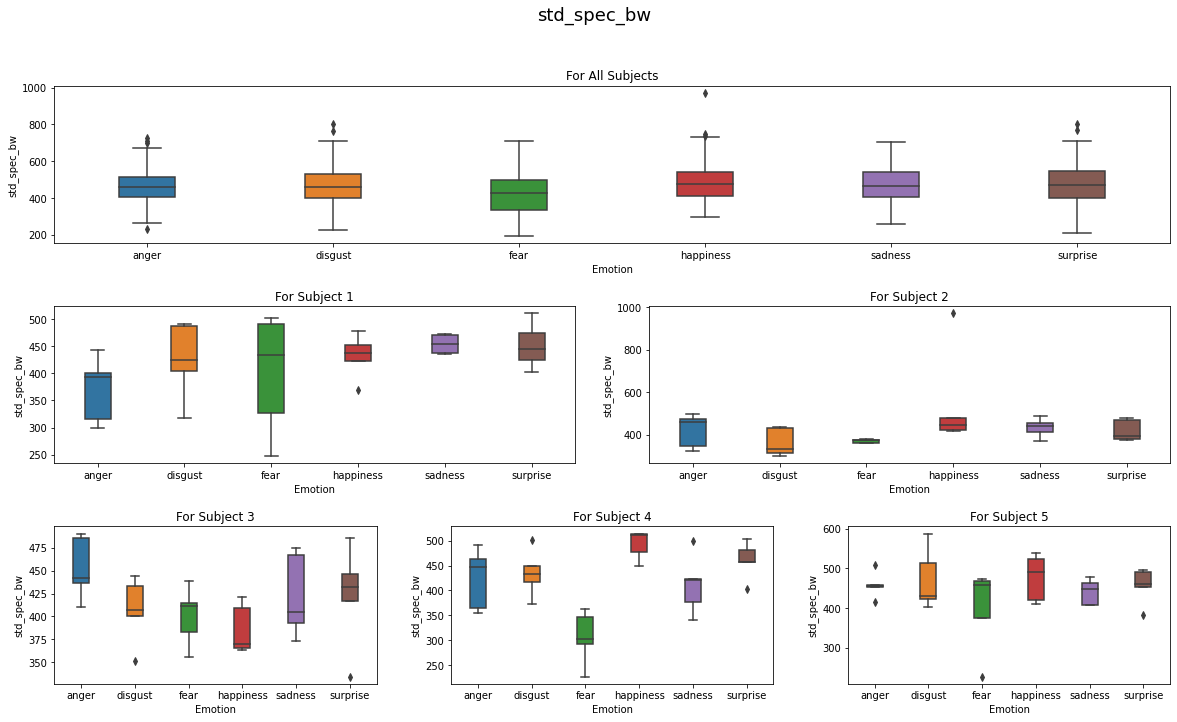

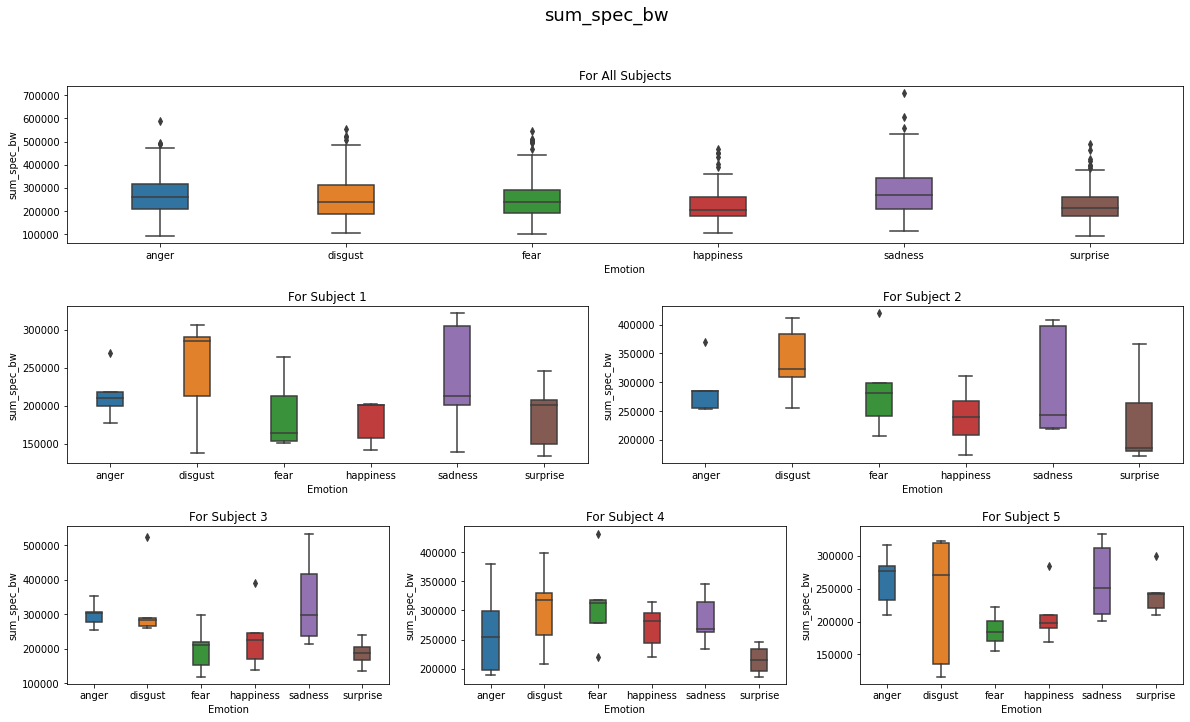

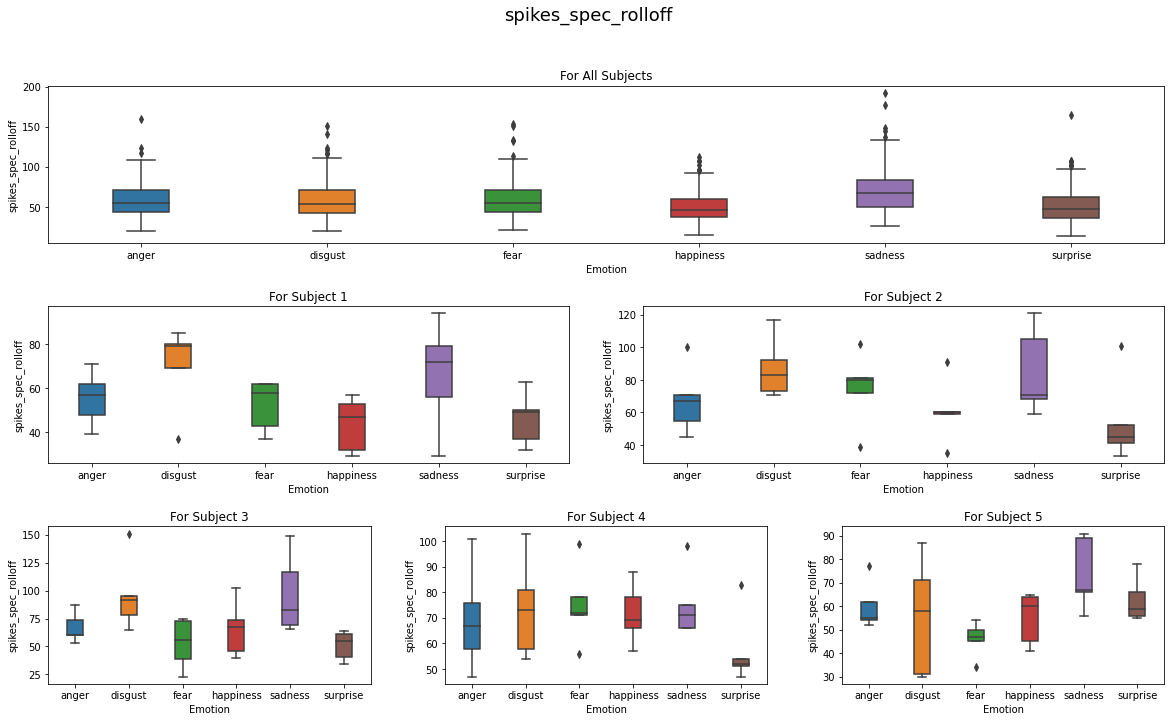

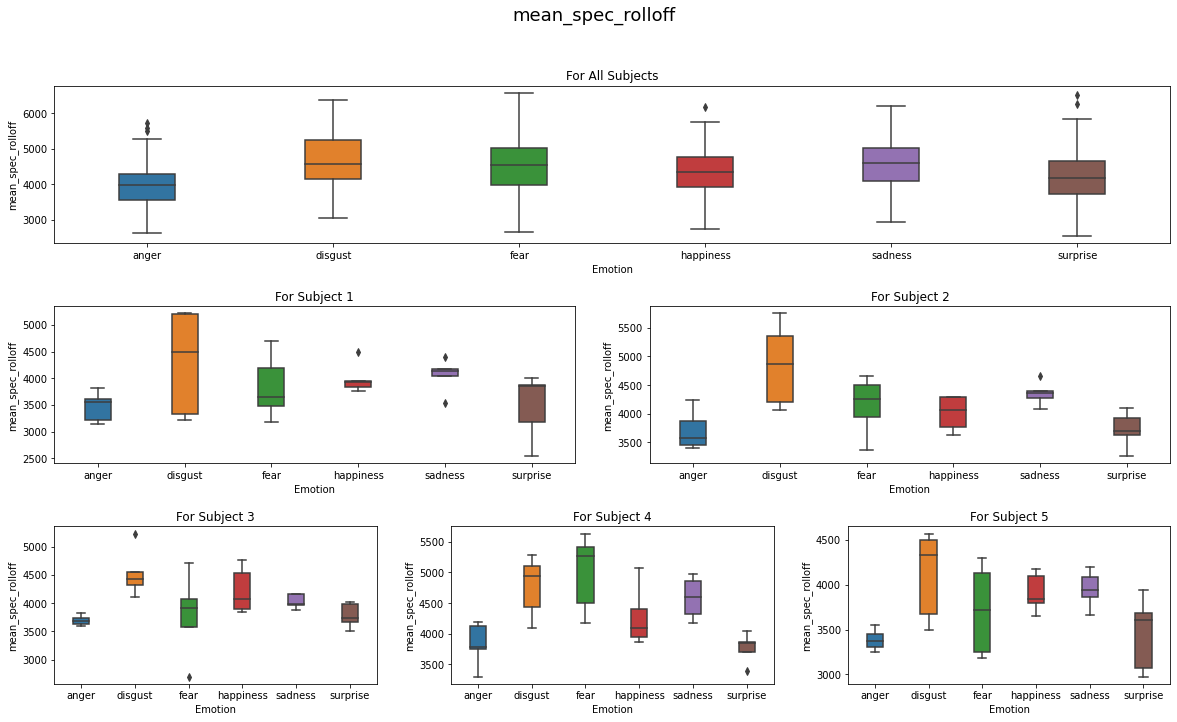

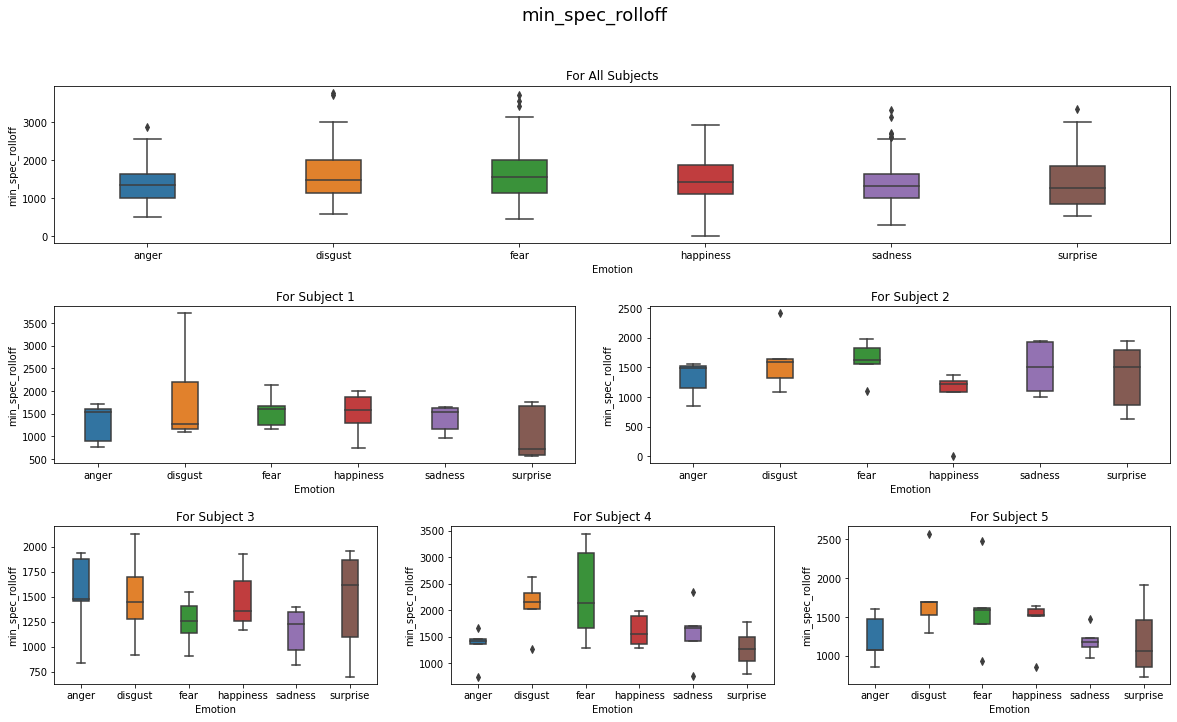

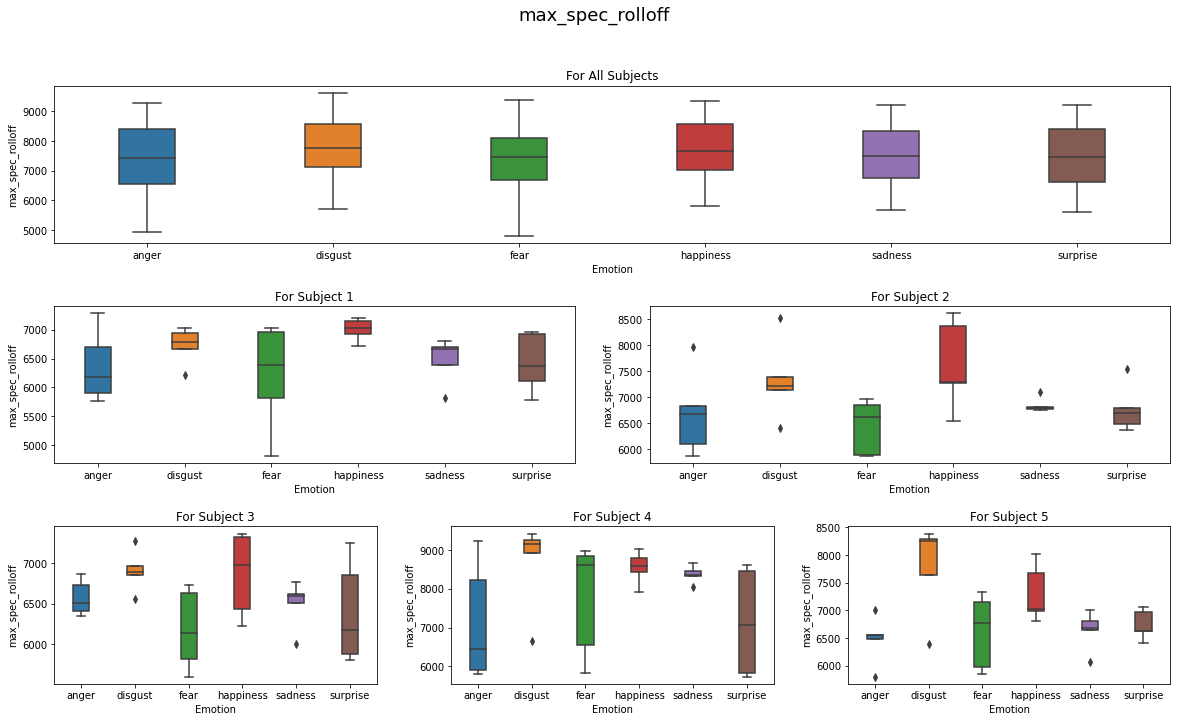

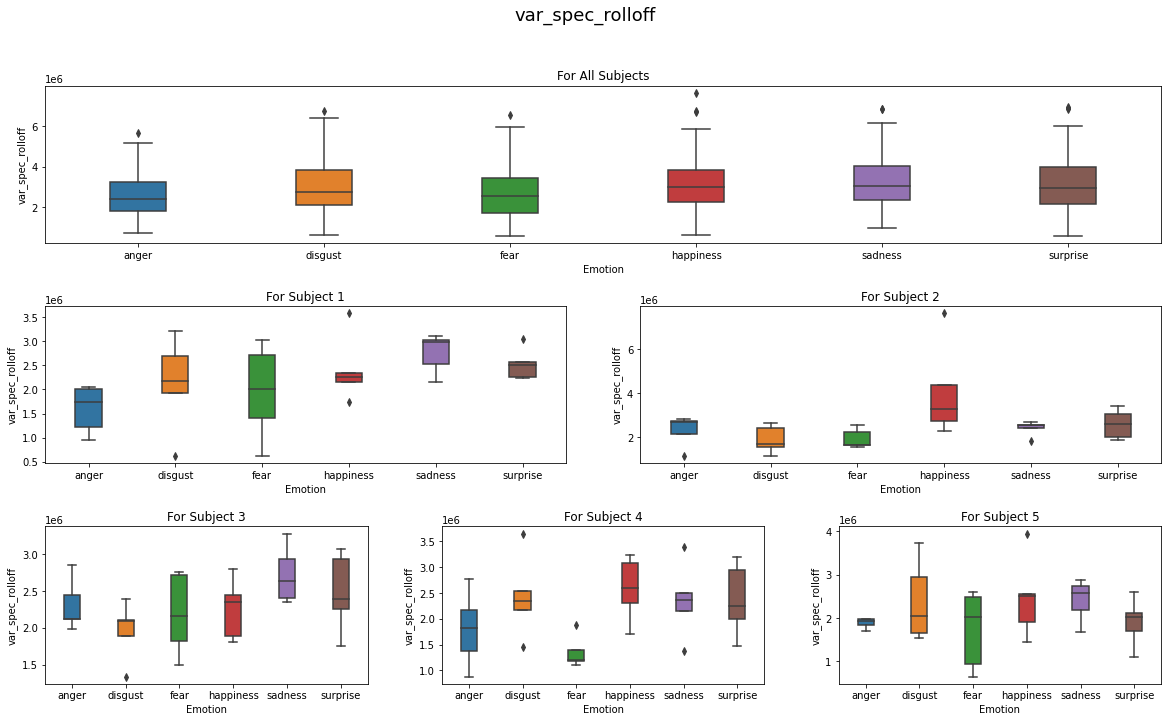

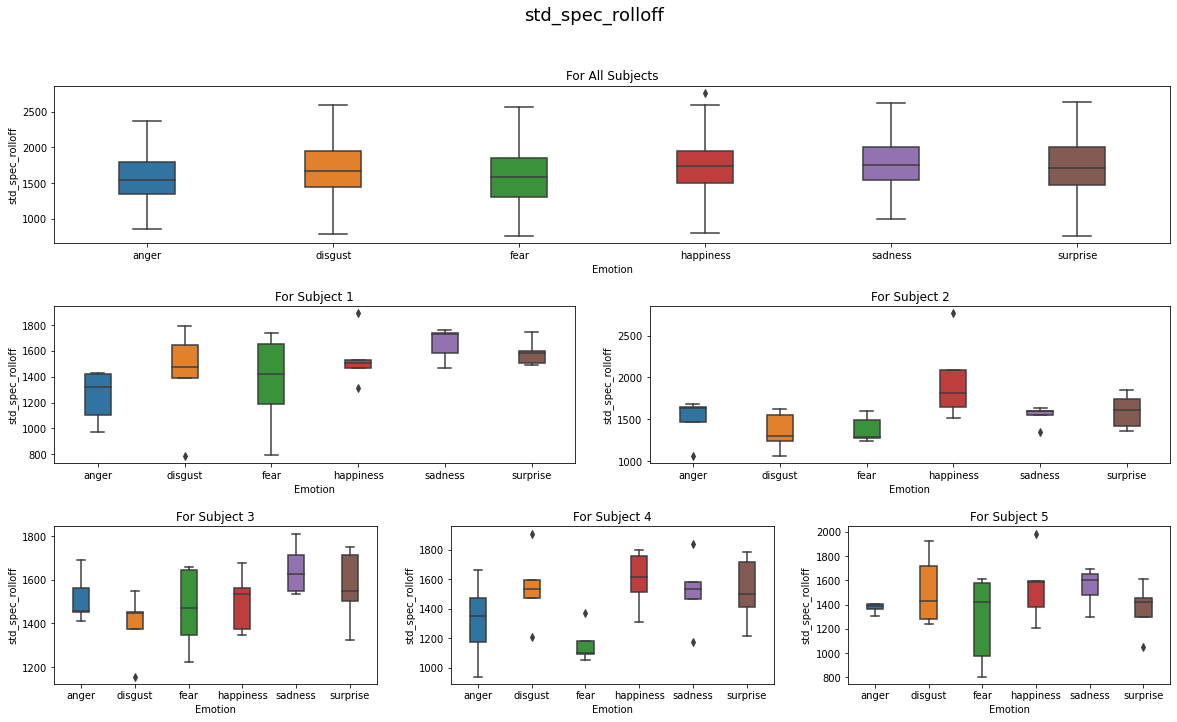

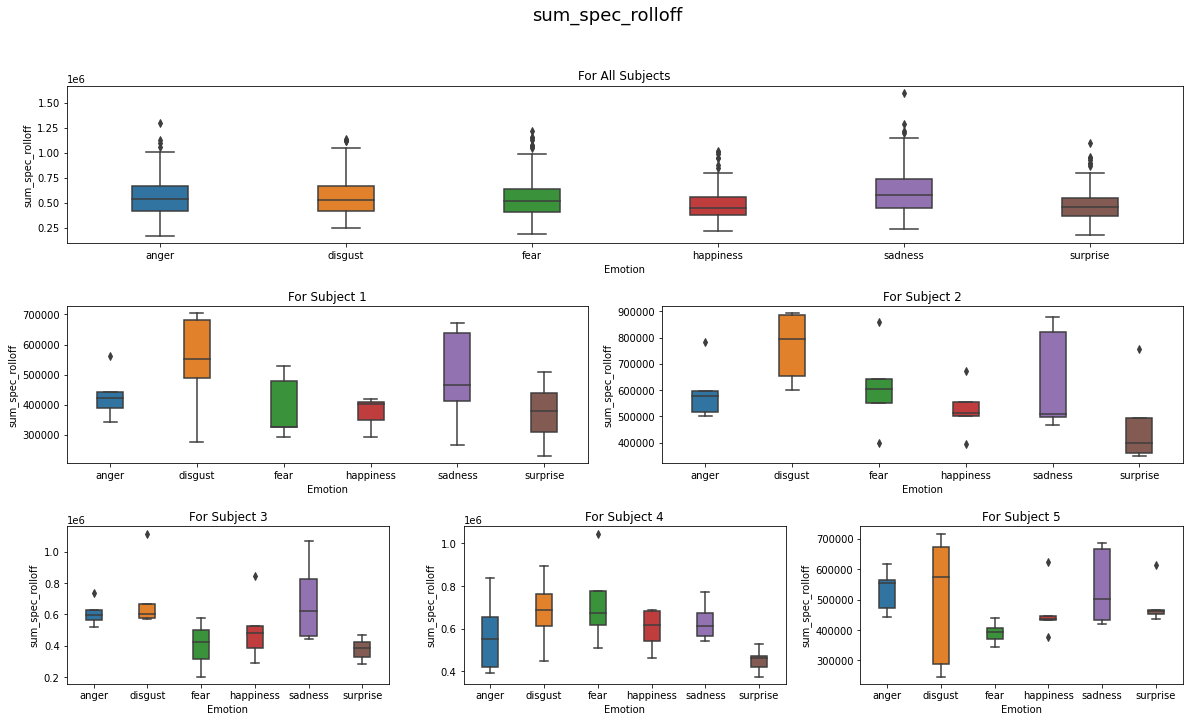

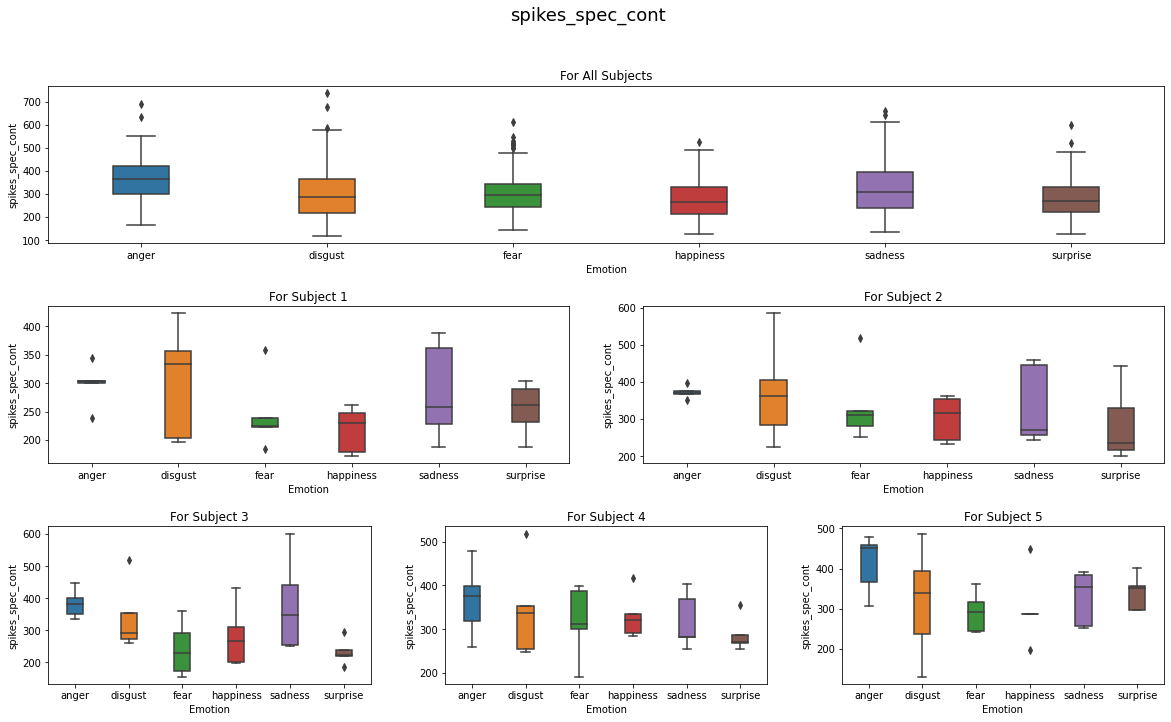

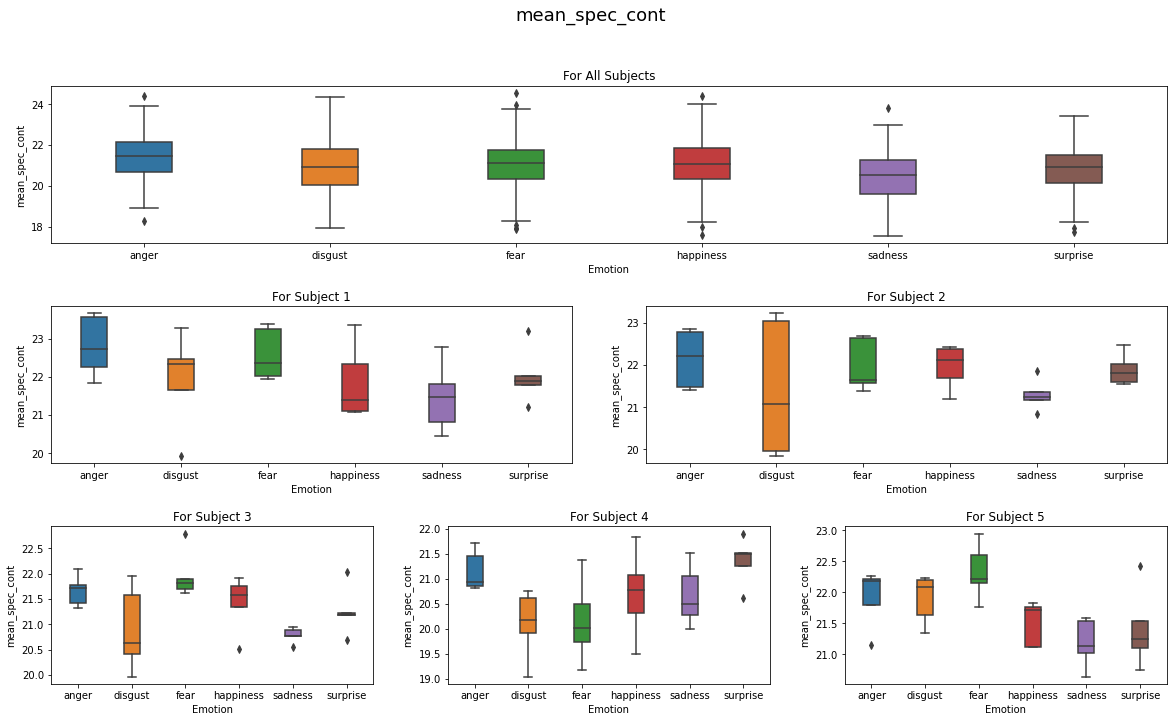

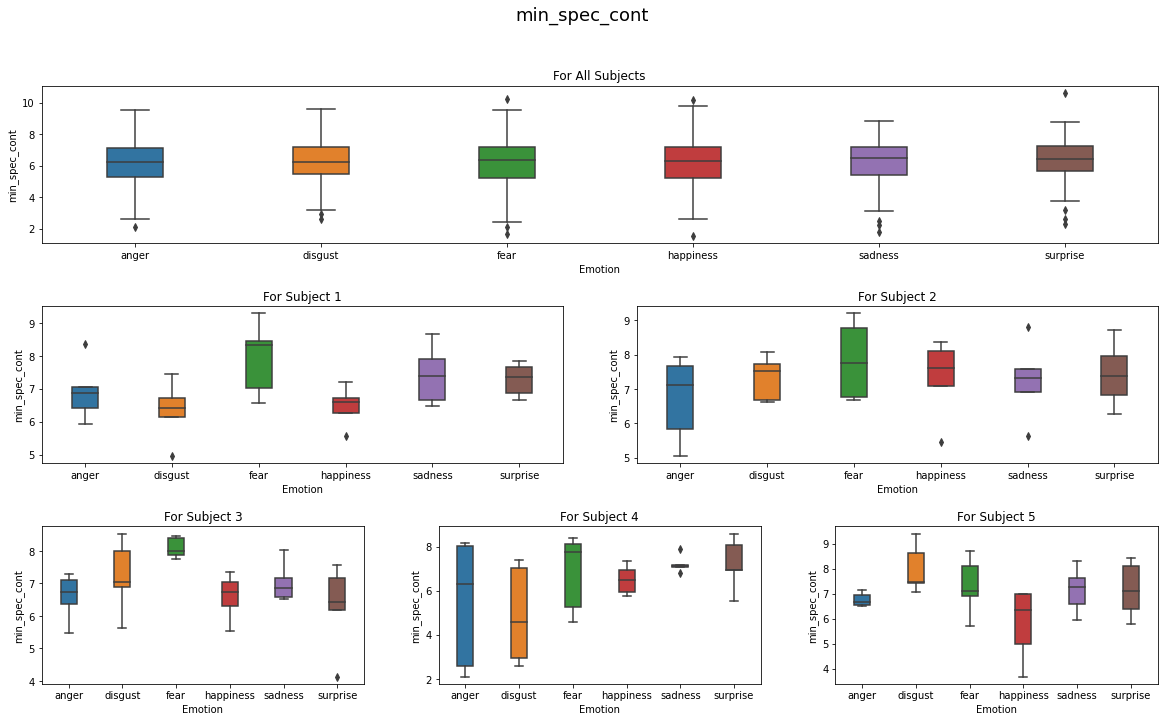

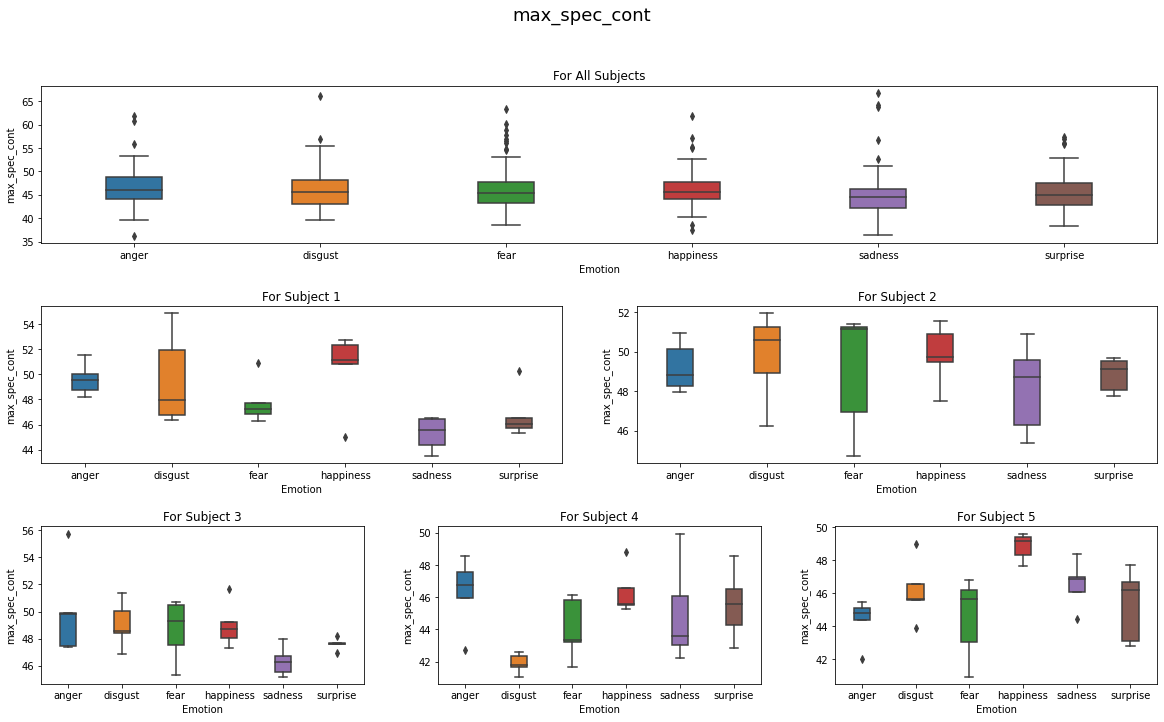

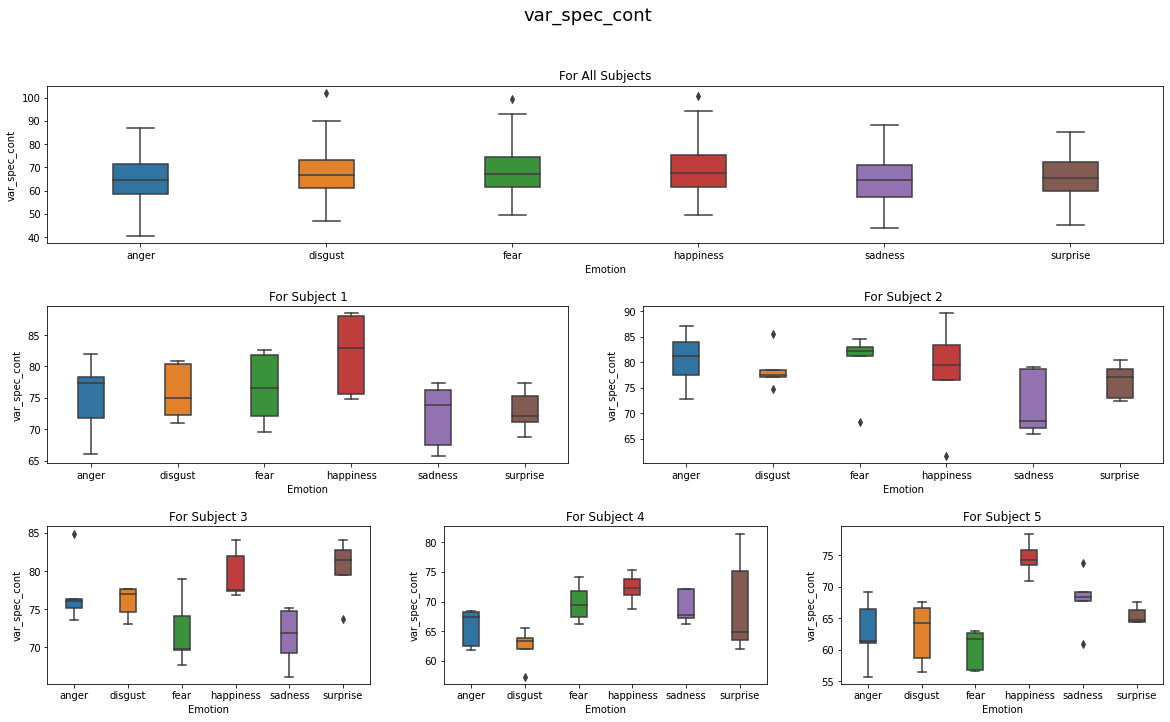

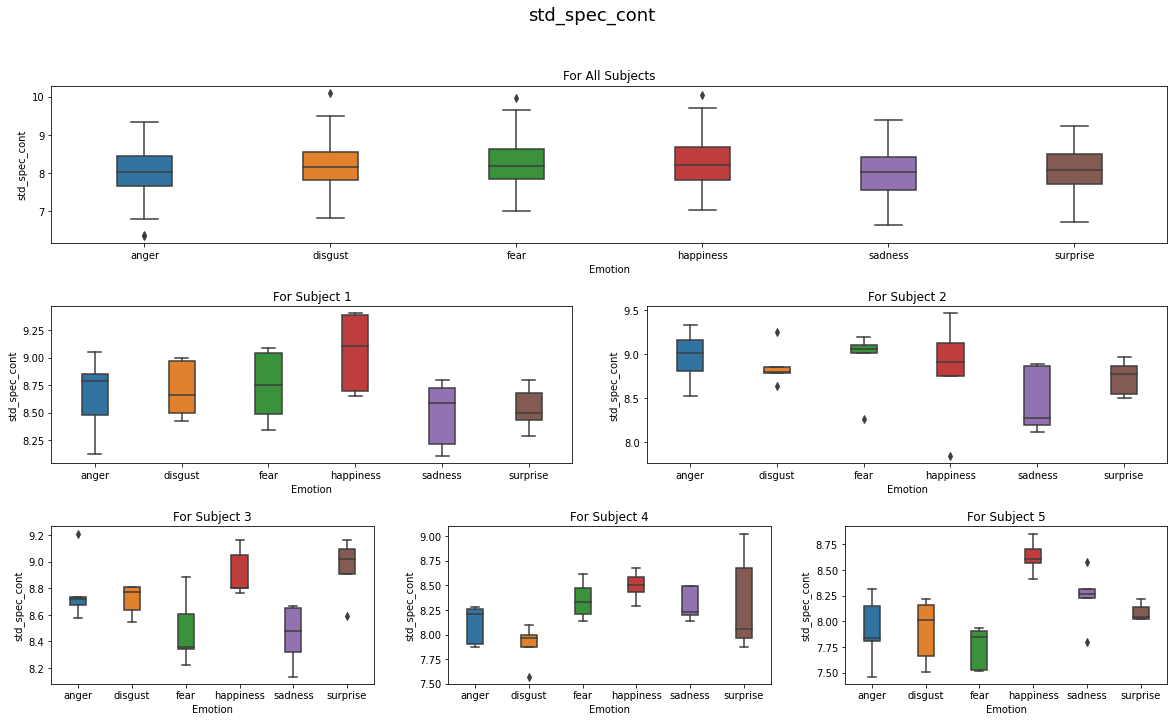

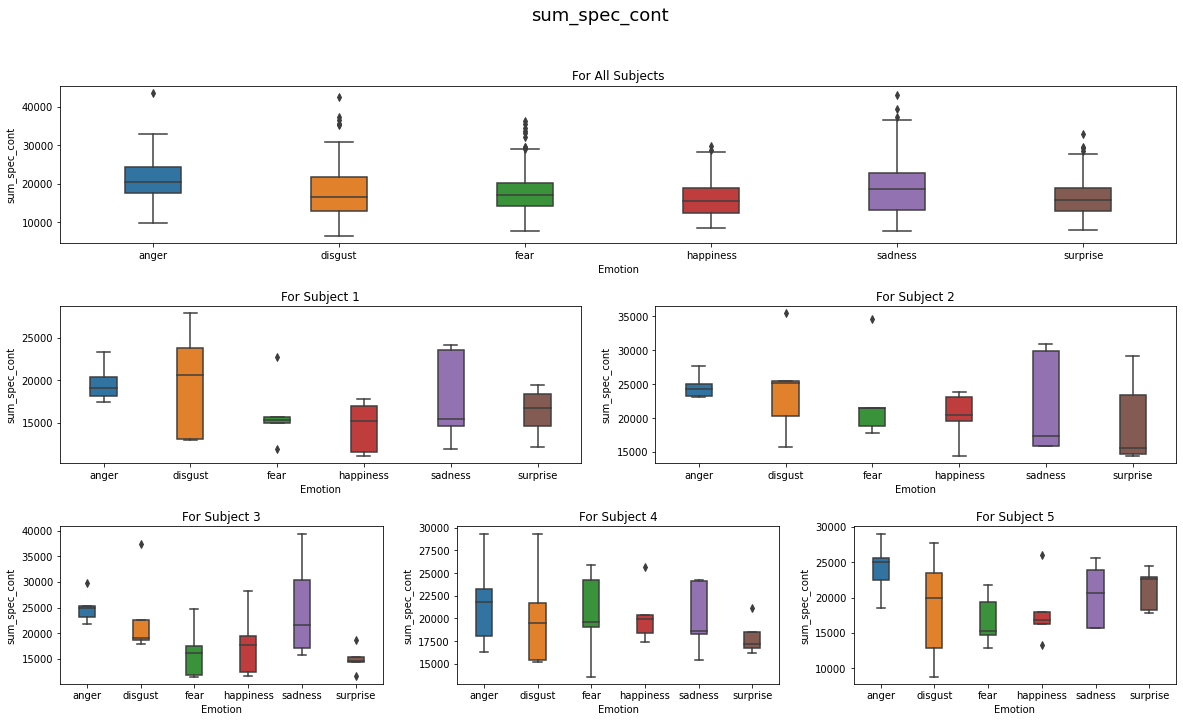

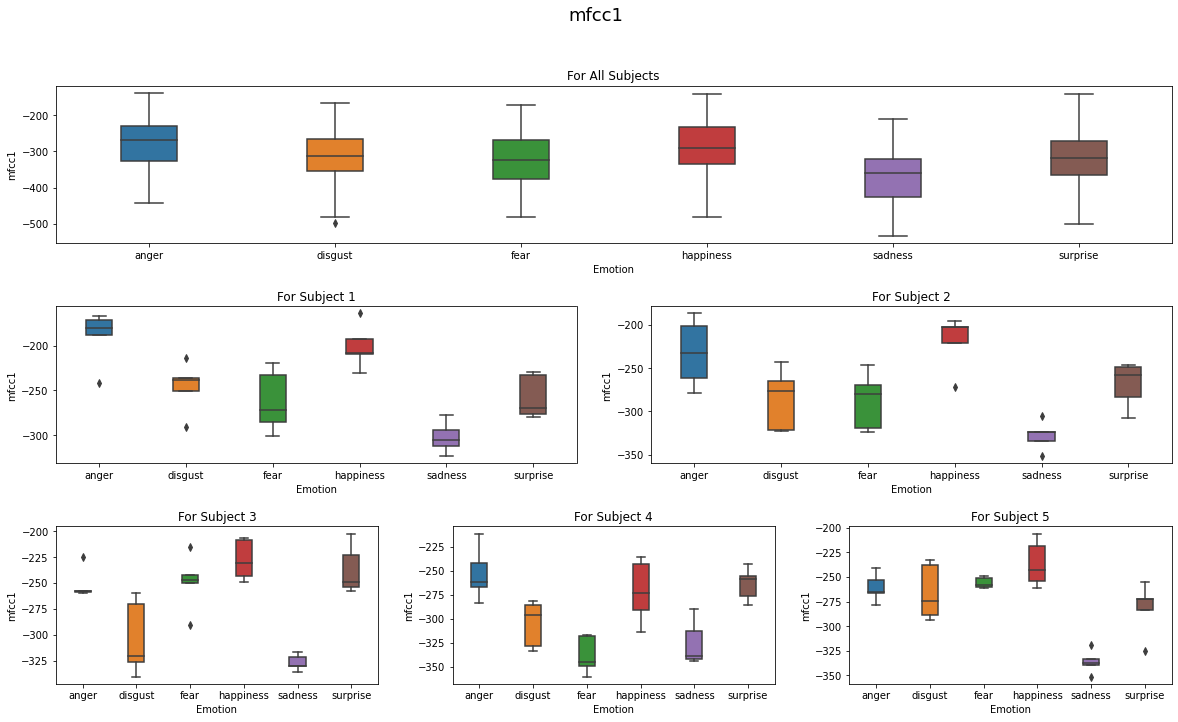

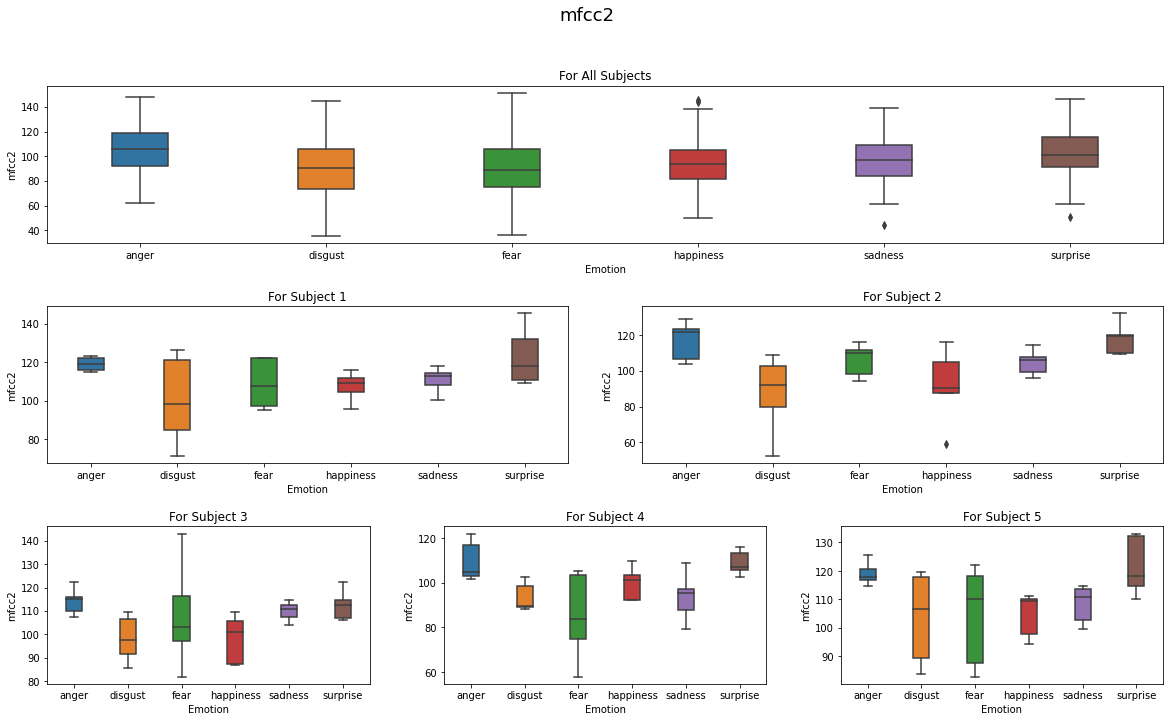

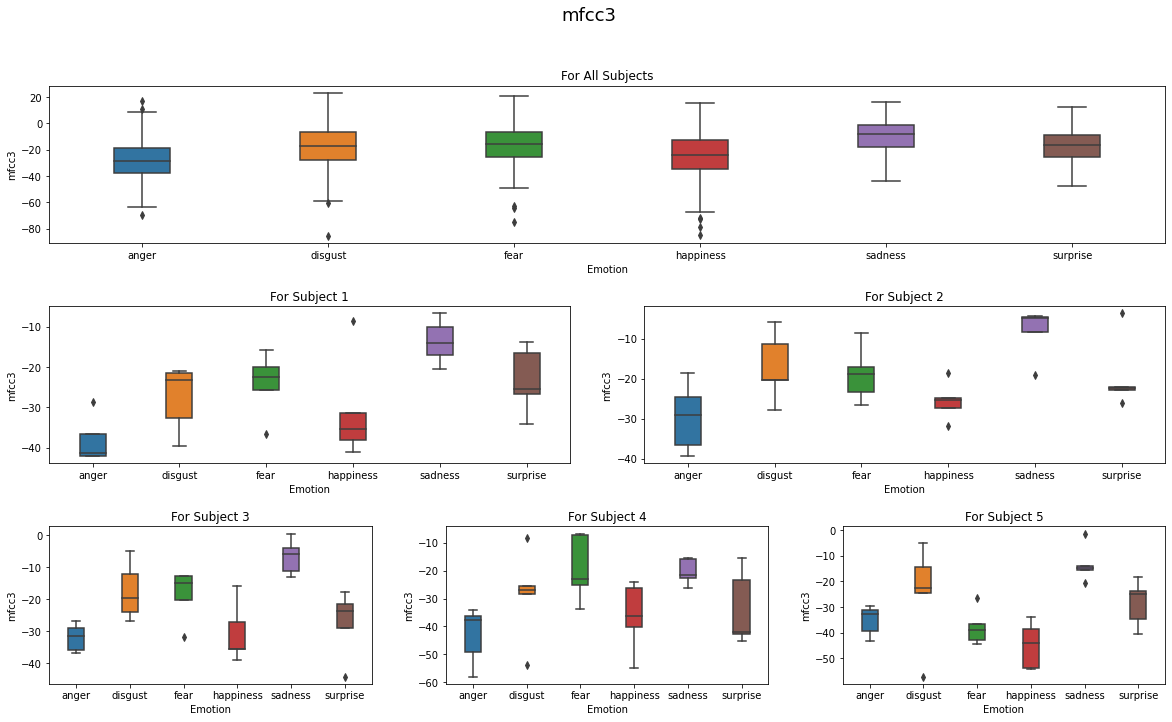

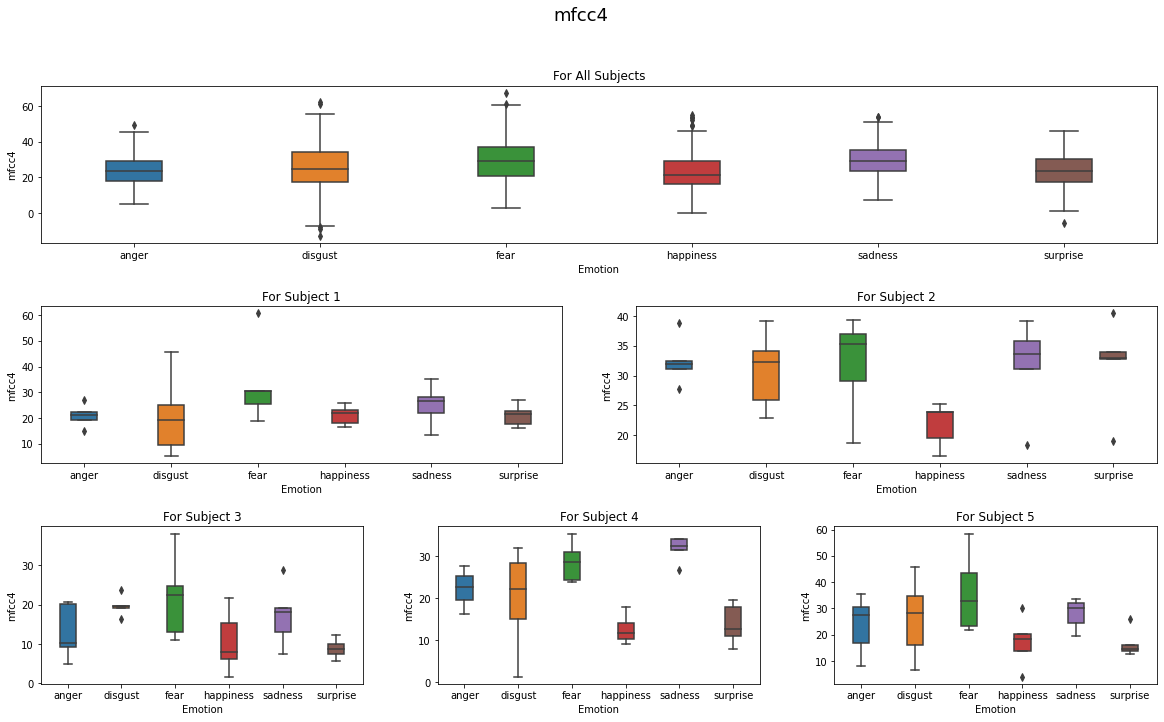

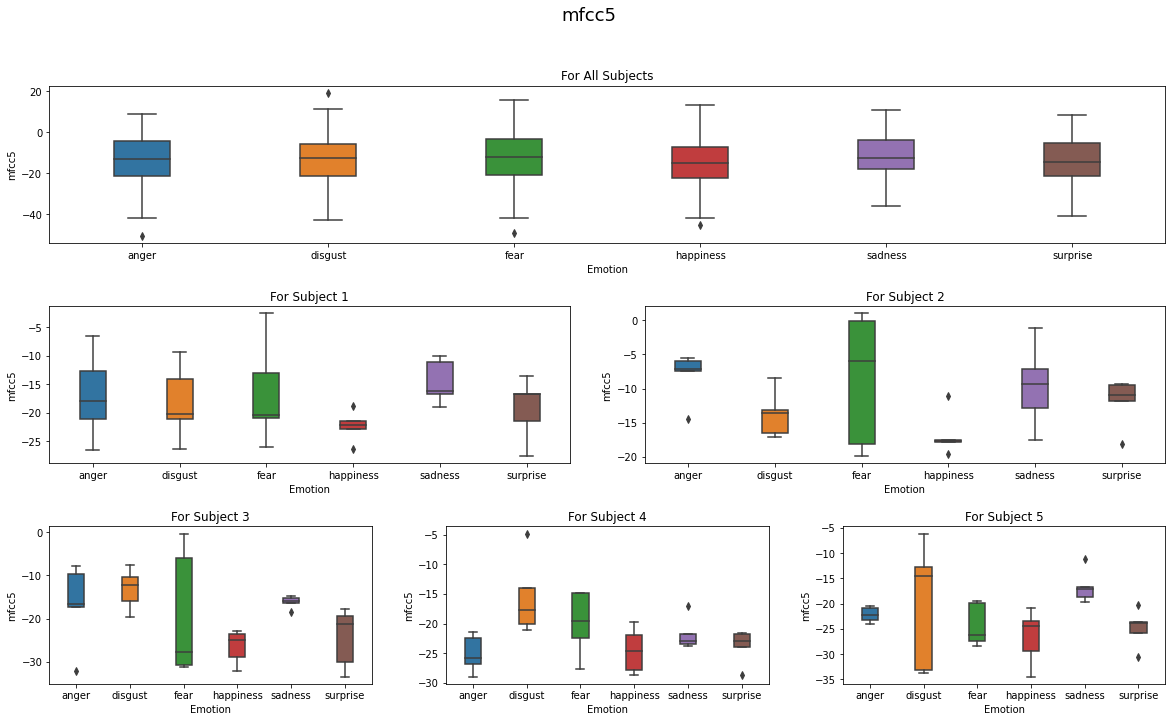

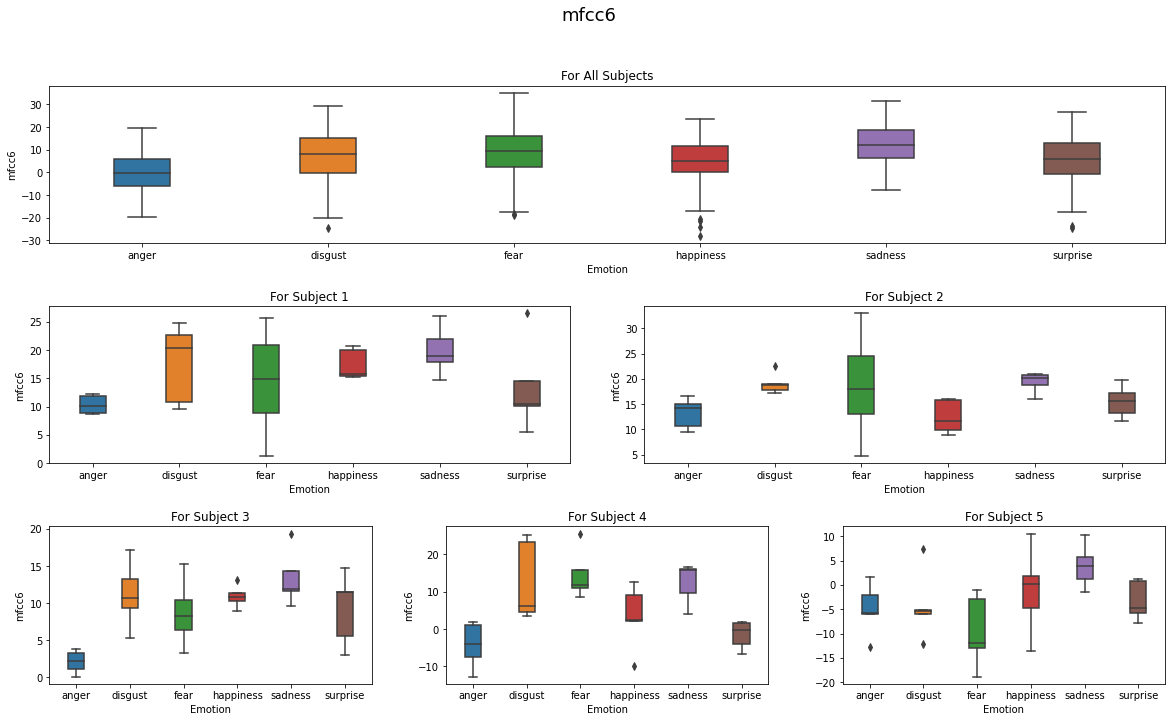

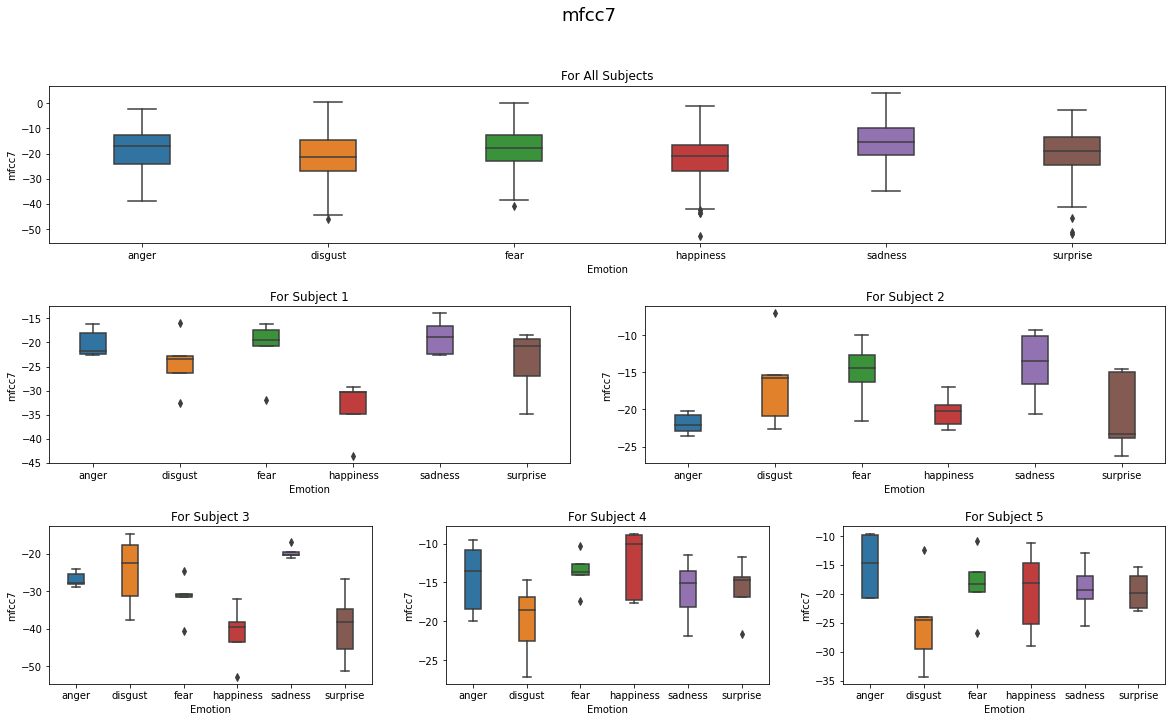

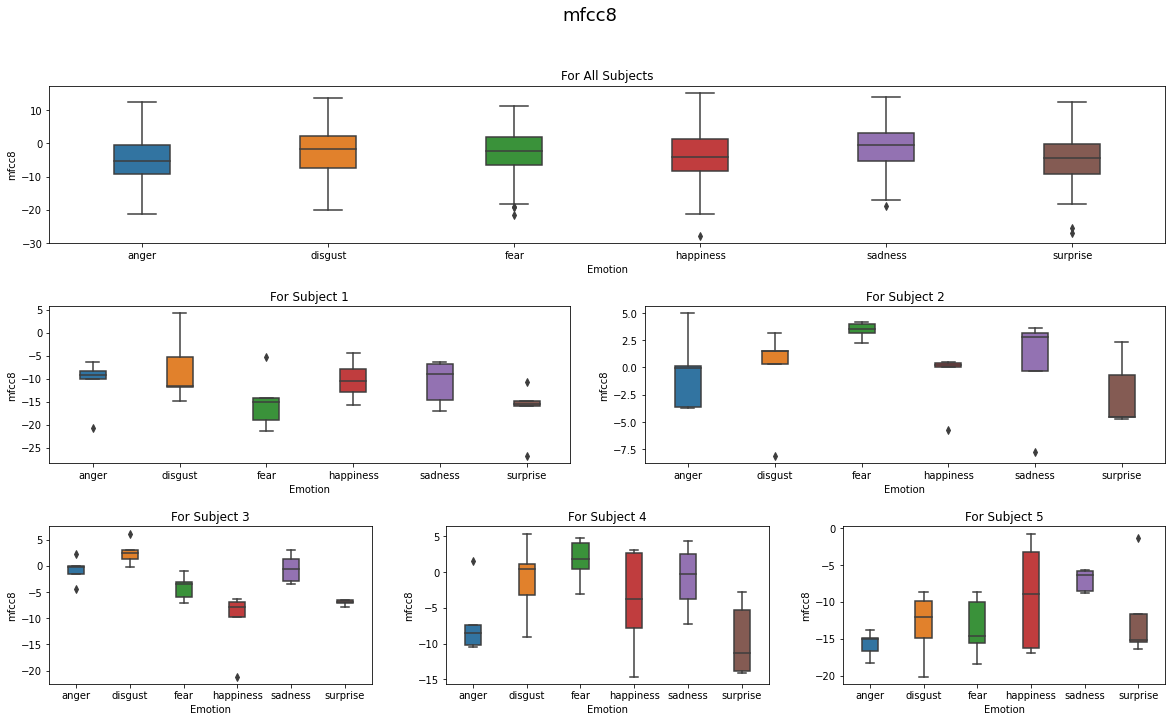

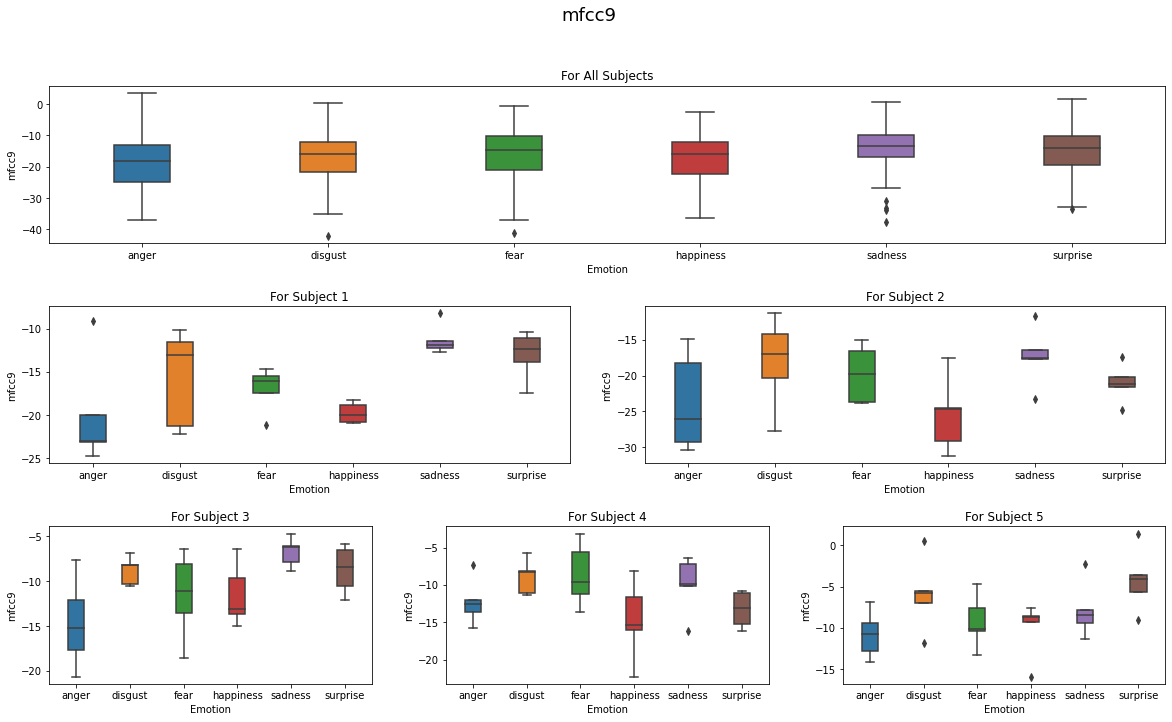

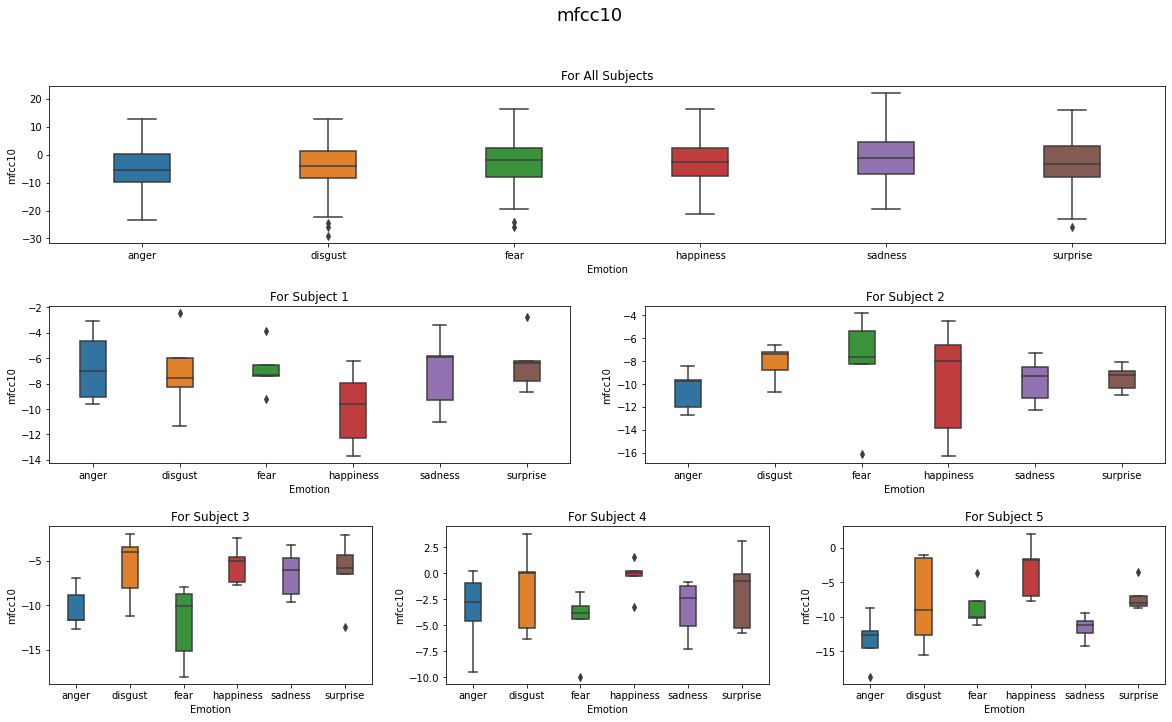

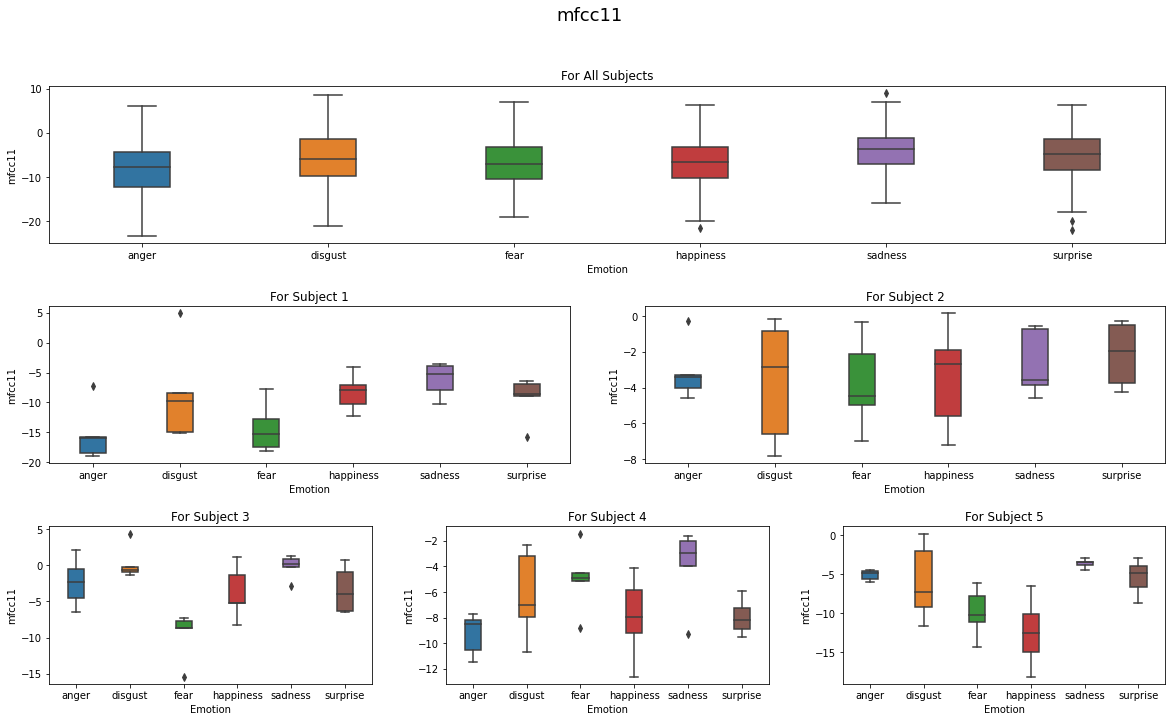

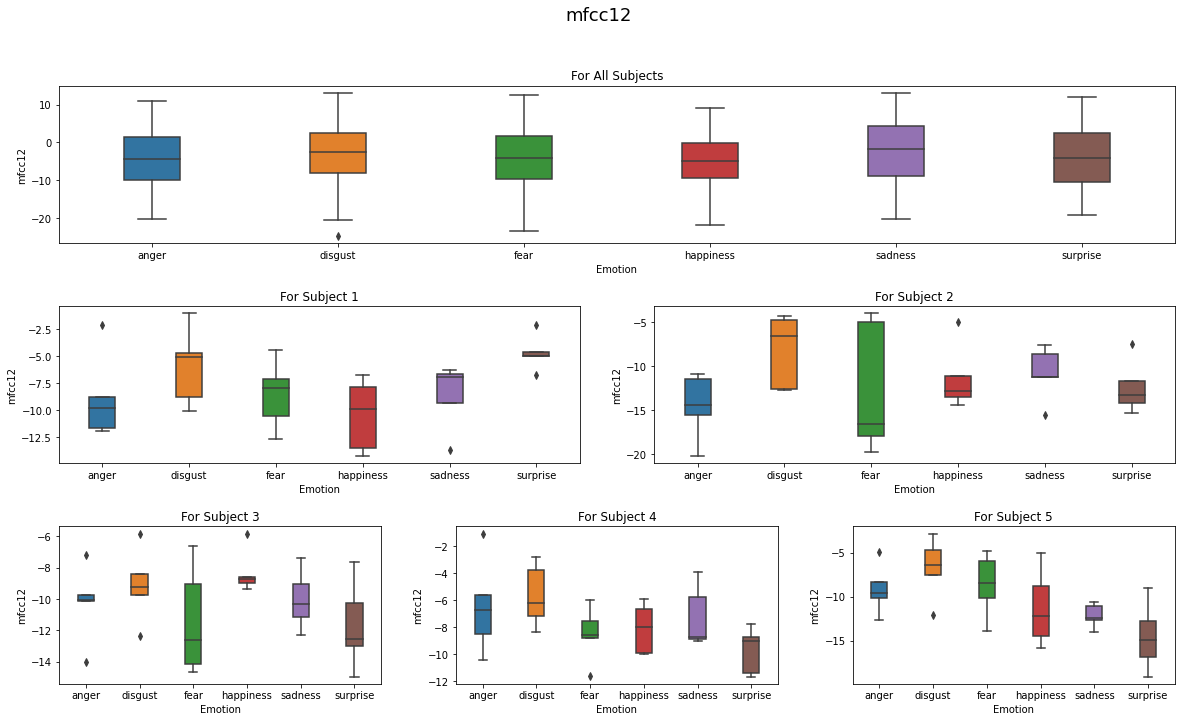

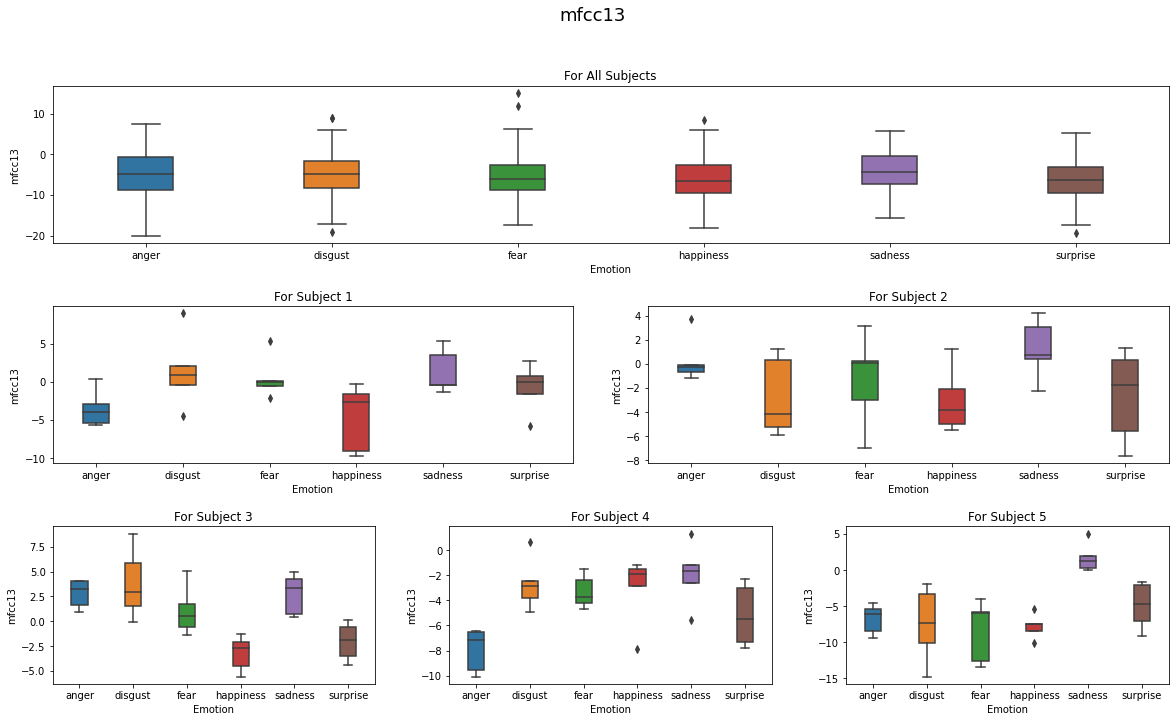

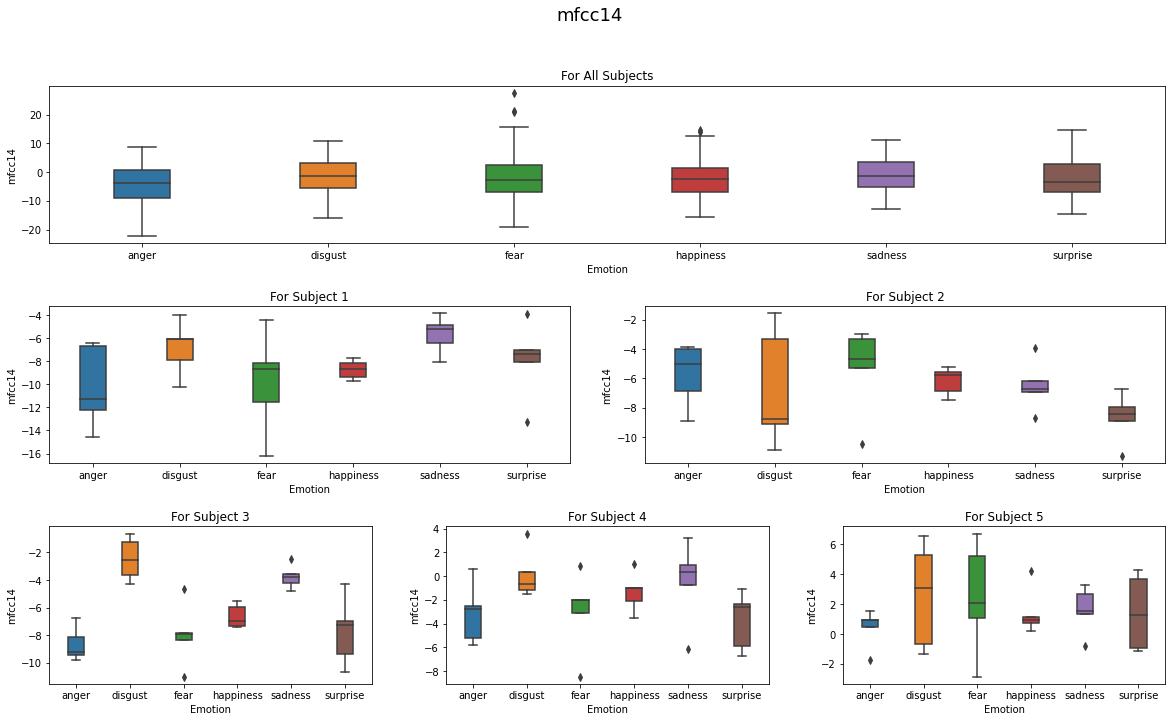

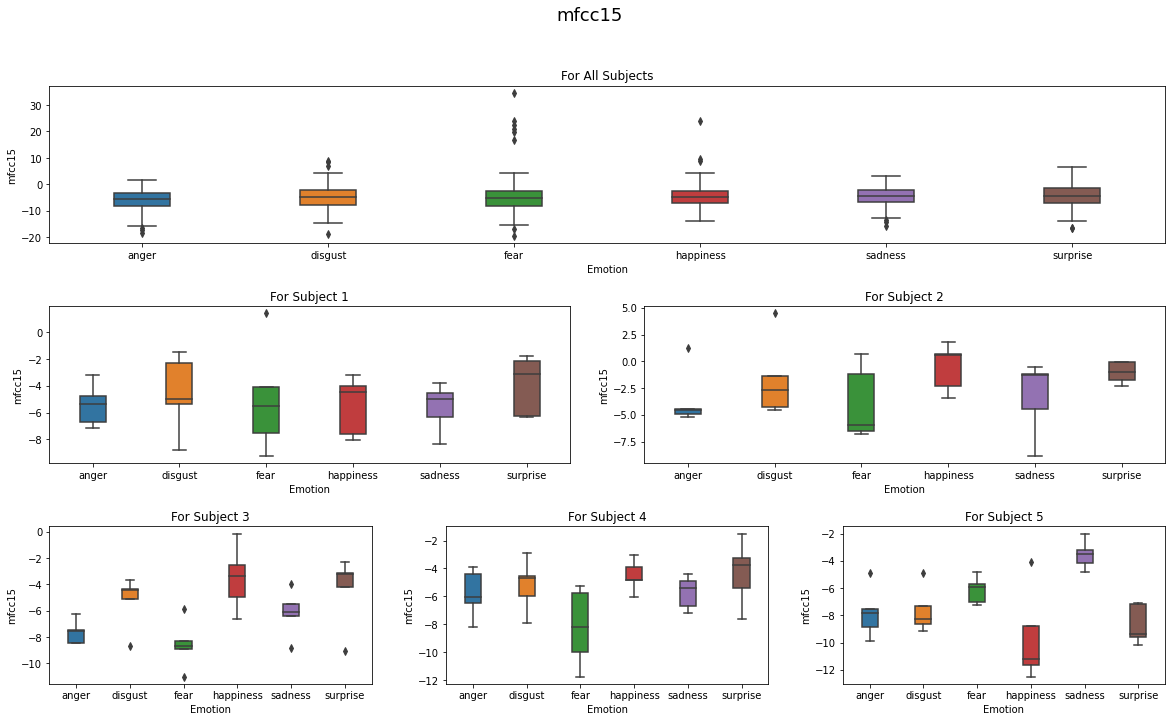

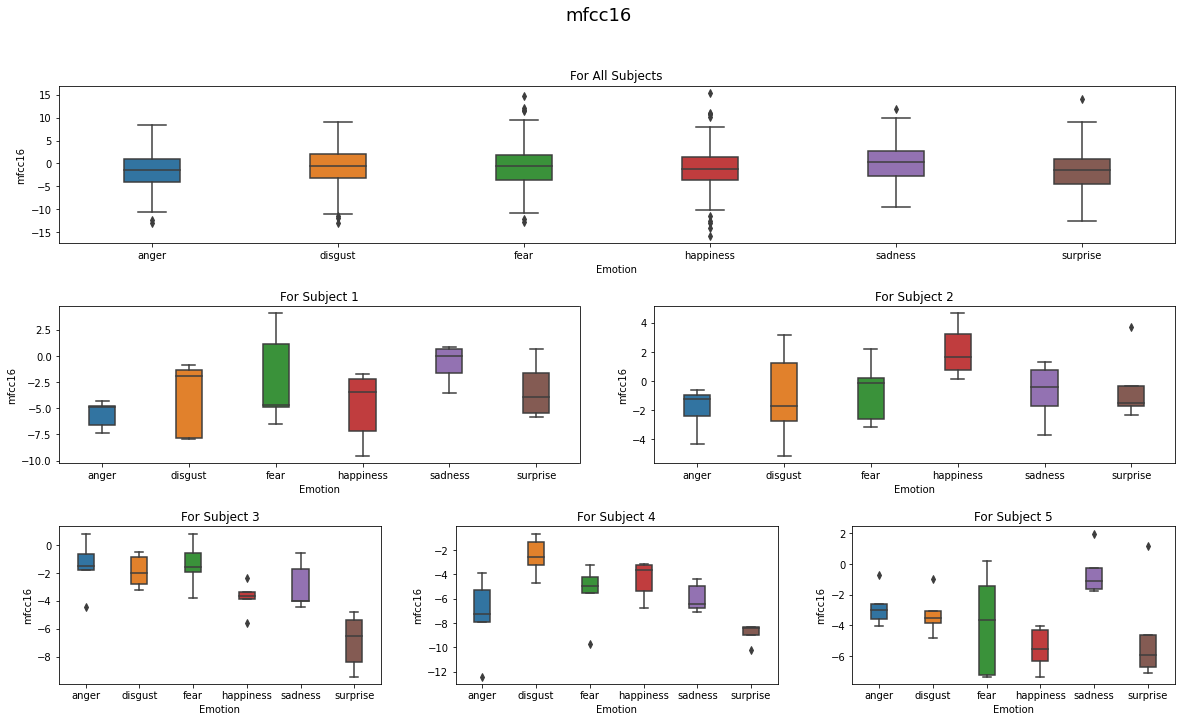

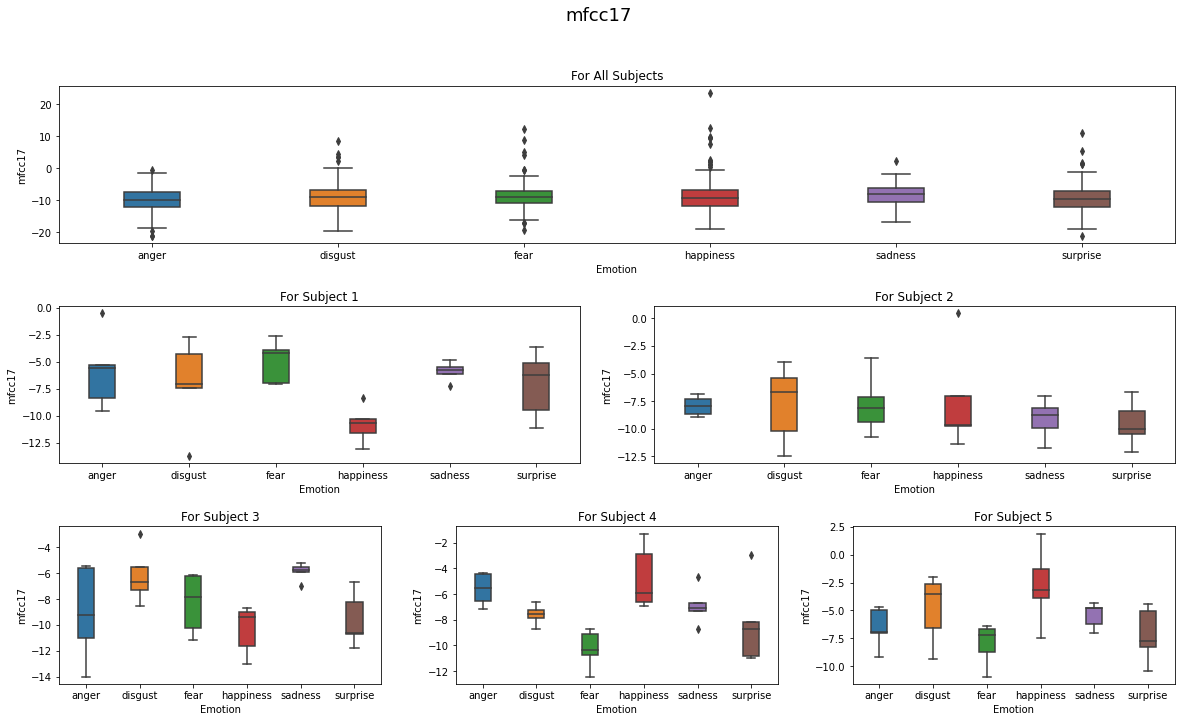

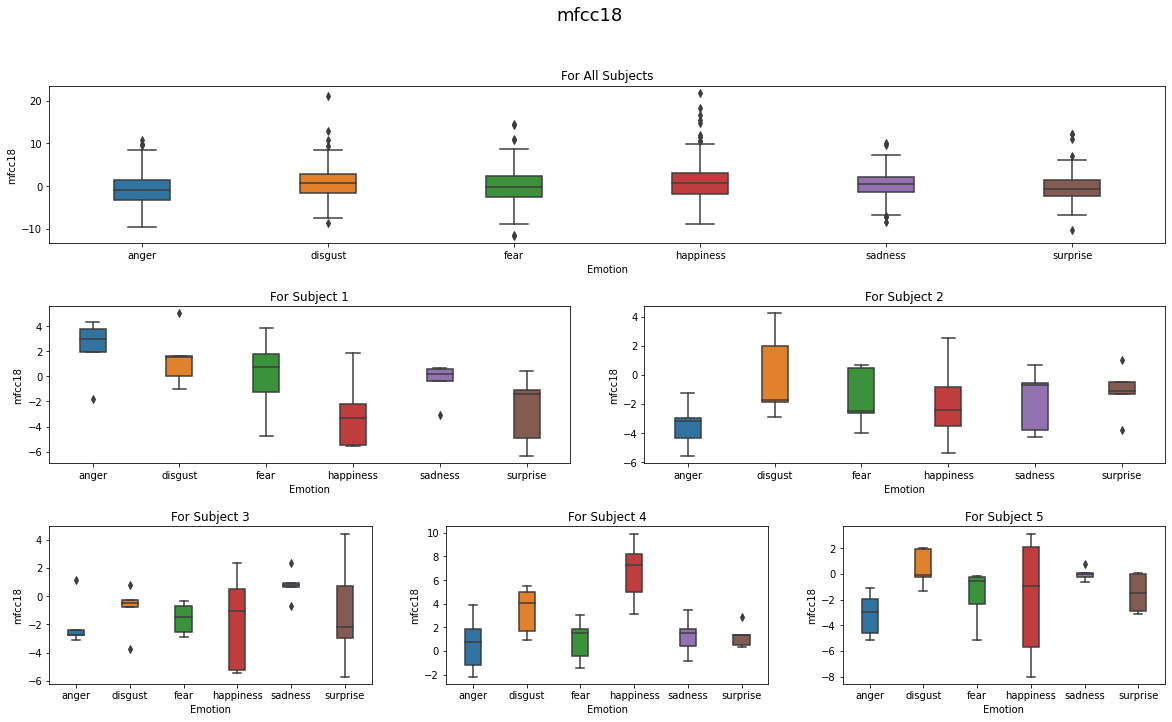

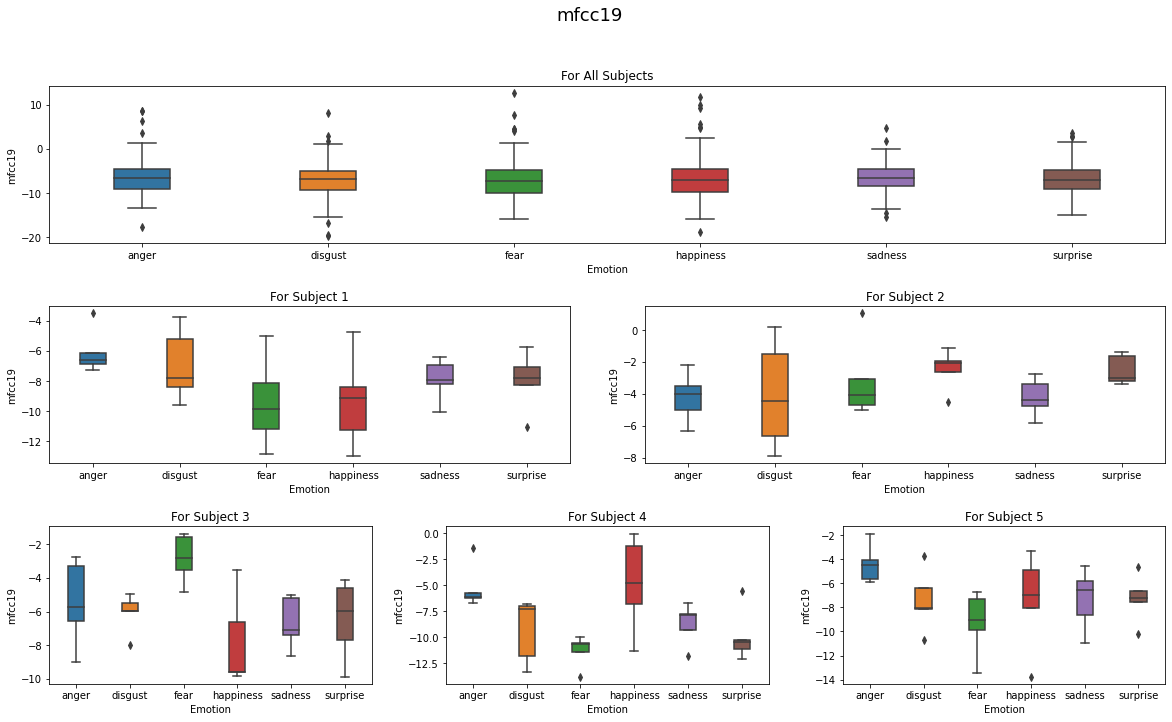

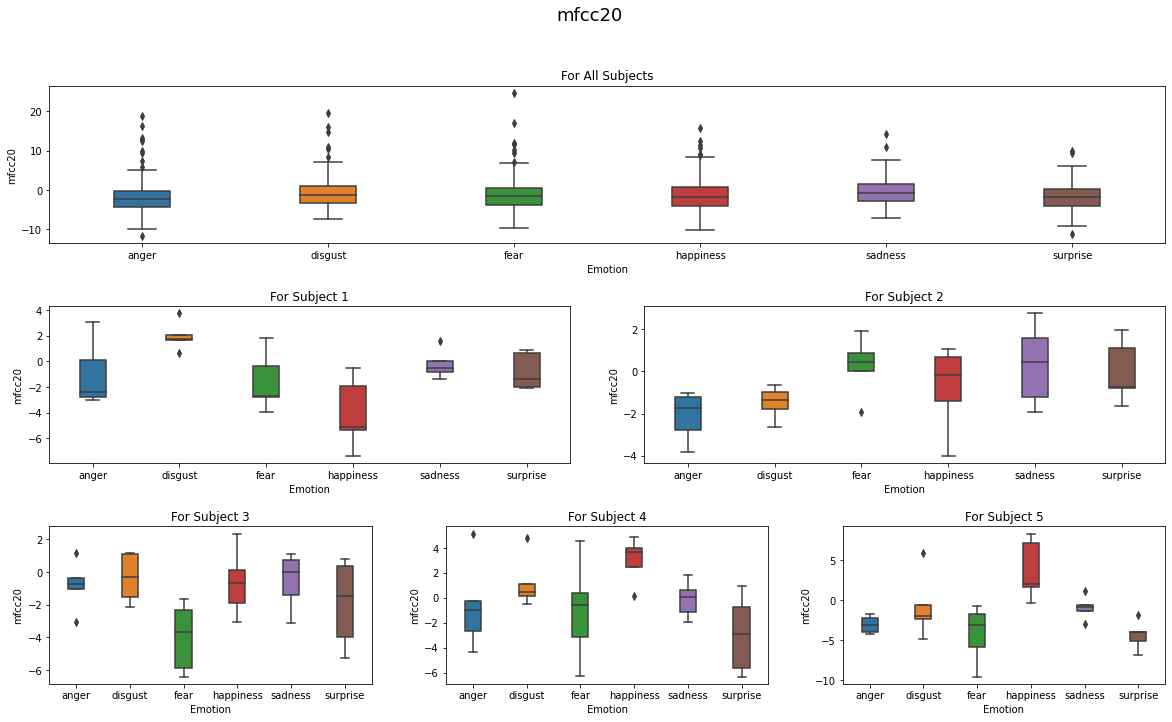

In [19]:
for feature in df.columns[4:]:
    if '_zcr' not in feature:
        analyse_feature(df, feature)